# Machine learning summative assessment - Airline Avionics

#### Michael NANA KAMENI

## Let us import useful libraries

In [1]:
# Let us import useful libraries
import pandas                              as pd
import numpy                               as np
import seaborn                             as sns
import matplotlib.pyplot                   as plt

from sklearn.model_selection               import KFold, cross_val_score, train_test_split 
from scipy                                 import stats
from sklearn                               import preprocessing
from sklearn.ensemble                      import RandomForestClassifier
from sklearn.decomposition                 import PCA
from sklearn.metrics                       import silhouette_score, accuracy_score
from sklearn.cluster                       import KMeans
from sklearn.feature_selection             import SelectFromModel
from xgboost                               import XGBClassifier
from sklearn.ensemble                      import ExtraTreesClassifier
from sklearn.metrics                       import mean_squared_error

import warnings
warnings.filterwarnings("ignore")
# Display graphics in Jupyter Notebook
%matplotlib inline

## Task 1 Import and clean data

In [2]:
# Let us load the ml_summative_raw.csv file of data.
df = pd.read_csv('ml_summative_raw.csv', sep =',')
df.head()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,NaN,96.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.0
1,2,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,134.0,138.0,100.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
2,3,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,120.0
3,4,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.0
4,5,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,NaN,100.0,100.0,200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.0


In [3]:
# Let us have a look the five last rows
df.tail()

,Unnamed: 0,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
75125,75126,2016-12-24,ZA12B3RT,ST8000DM002,8001563222016,1,NaN,98.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,171.915576
75126,75127,2016-12-24,ZA12PTR5,ST8000DM002,8001563222016,0,NaN,99.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,79.000000
75127,75128,2016-12-24,Z305D4X6,ST4000DM000,4000787030016,0,NaN,96.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,117.000000
75128,75129,2016-12-24,Z302EPA7,ST4000DM000,4000787030016,0,NaN,93.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,114.000000
75129,75130,2016-12-24,W300D55C,ST4000DM000,4000787030016,0,NaN,91.0,100.0,100.0,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,106.000000


In [4]:
df.shape

(75130, 50)

In [5]:
# Let us identify any missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Current Helium Level,75130,100.000000
Soft Read Error Rate,75130,100.000000
Soft Read Error Rateor,75130,100.000000
smart_15,75130,100.000000
Load Friction,75070,99.920138
Loaded Hours,75070,99.920138
Disk Shift,75070,99.920138
Load In-time,75070,99.920138
Load/Unload Cycle Count,74562,99.243977
Load/Unload Retry Count,74502,99.164116


Let us drop all columns values that have more than fifty percent of missing values.

In [6]:
# Let us get rid of all the columns where more than 95 percent of values are null:
df.drop(df.loc[:,(df.isnull().sum()/df.isnull().count()*100)>=95], axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
# Let us check with percentage missing values:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Free Fall Protection,71334,94.947424
Recalibration Retriesor Calibration Retry Count,68171,90.737389
Write Error Rate(Fujitsu),68171,90.737389
Hardware ECC Recovered,65846,87.642753
Throughput Performance,65504,87.187542
Seek Time Performance,65504,87.187542
Reallocation Event Count,59113,78.680953
SATA Downshift Error Count or Runtime Bad Block,21737,28.932517
Total LBAs Written,16129,21.468122
Total LBAs Read,16129,21.468122


In [8]:
# Let us fill the missing values with the mean:
df['Seek Time Performance'] = df['Seek Time Performance'].fillna(df['Seek Time Performance'].mean())
df['Free Fall Protection'] = df['Free Fall Protection'].fillna(df['Free Fall Protection'].mean())
df['Throughput Performance'] = df['Throughput Performance'].fillna(df['Throughput Performance'].mean())
df['Hardware ECC Recovered'] = df['Hardware ECC Recovered'].fillna(df['Hardware ECC Recovered'].mean())
df['Write Error Rate(Fujitsu)'] = df['Write Error Rate(Fujitsu)'].fillna(df['Write Error Rate(Fujitsu)'].mean())
df['Total LBAs Written'] = df['Total LBAs Written'].fillna(df['Total LBAs Written'].mean())
df['Total LBAs Read'] = df['Total LBAs Read'].fillna(df['Total LBAs Read'].mean())
df['High Fly Writes'] = df['High Fly Writes'].fillna(df['High Fly Writes'].mean())
df["Head Flying Hours\xa0or 'Transfer Error Rate'(Fujitsu)"] = df["Head Flying Hours\xa0or 'Transfer Error Rate'(Fujitsu)"].fillna(df["Head Flying Hours\xa0or 'Transfer Error Rate'(Fujitsu)"].mean())
df['Reported Uncorrectable Errors'] = df['Reported Uncorrectable Errors'].fillna(df['Reported Uncorrectable Errors'].mean())
df['End-to-End error / IOEDC'] = df['End-to-End error / IOEDC'].fillna(df['End-to-End error / IOEDC'].mean())
df['Command Timeout'] = df['Command Timeout'].fillna(df['Command Timeout'].mean())
df['Temperature Difference\xa0or\xa0Airflow Temperature'] = df['Temperature Difference\xa0or\xa0Airflow Temperature'].fillna(df['Temperature Difference\xa0or\xa0Airflow Temperature'].mean())
df['G-sense Error Rate'] = df['G-sense Error Rate'].fillna(df['G-sense Error Rate'].mean())
df['Read Error Rate'] = df['Read Error Rate'].fillna(df['Read Error Rate'].mean())
df['Temperature\xa0or\xa0Temperature Celsius'] = df['Temperature\xa0or\xa0Temperature Celsius'].fillna(df['Temperature\xa0or\xa0Temperature Celsius'].mean())
df['Power-On Hours'] = df['Power-On Hours'].fillna(df['Power-On Hours'].mean())
df['Seek Error Rate'] = df['Seek Error Rate'].fillna(df['Seek Error Rate'].mean())
df['Spin-Up Time'] = df['Spin-Up Time'].fillna(df['Spin-Up Time'].mean())
df['Recalibration Retriesor\xa0Calibration Retry Count'] = df['Recalibration Retriesor\xa0Calibration Retry Count'].fillna(df['Recalibration Retriesor\xa0Calibration Retry Count'].mean())
df['Reallocation Event Count']= df['Reallocation Event Count'].fillna(df['Reallocation Event Count'].mean())
df['Start/Stop Count'] = df['Start/Stop Count'].fillna(df['Start/Stop Count'].mean())
df['UltraDMA CRC Error Count'] = df['UltraDMA CRC Error Count'].fillna(df['UltraDMA CRC Error Count'].mean())
df['(Offline) Uncorrectable Sector Count'] = df['(Offline) Uncorrectable Sector Count'].fillna(df['(Offline) Uncorrectable Sector Count'].mean())
df['Current Pending Sector Count'] = df['Current Pending Sector Count'].fillna(df['Current Pending Sector Count'].mean())
df['Power Cycle Count'] = df['Power Cycle Count'].fillna(df['Power Cycle Count'].mean())
df['Reallocated Sectors Count'] = df['Reallocated Sectors Count'].fillna(df['Reallocated Sectors Count'].mean())
df['Spin Retry Count'] = df['Spin Retry Count'].fillna(df['Spin Retry Count'].mean())
df['Load Cycle Count\xa0or\xa0Load/Unload Cycle Count\xa0(Fujitsu)'] = df['Load Cycle Count\xa0or\xa0Load/Unload Cycle Count\xa0(Fujitsu)'].fillna(df['Load Cycle Count\xa0or\xa0Load/Unload Cycle Count\xa0(Fujitsu)'].mean())
df['Power-off Retract Count,\xa0Emergency Retract Cycle Count(Fujitsu)or\xa0Unsafe Shutdown Count'] = df['Power-off Retract Count,\xa0Emergency Retract Cycle Count(Fujitsu)or\xa0Unsafe Shutdown Count'].fillna(df['Power-off Retract Count,\xa0Emergency Retract Cycle Count(Fujitsu)or\xa0Unsafe Shutdown Count'].mean())
df['SATA Downshift Error Count\xa0or\xa0Runtime Bad Block'] = df["SATA Downshift Error Count\xa0or\xa0Runtime Bad Block"].fillna(df["SATA Downshift Error Count\xa0or\xa0Runtime Bad Block"].mean()) 

In [9]:
# Let us check with percentage missing values:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Read Error Rate,0,0.0
Free Fall Protection,0,0.0
SATA Downshift Error Count or Runtime Bad Block,0,0.0
Power Cycle Count,0,0.0
Recalibration Retriesor Calibration Retry Count,0,0.0
Spin Retry Count,0,0.0
Power-On Hours,0,0.0
Seek Time Performance,0,0.0
Seek Error Rate,0,0.0
Reallocated Sectors Count,0,0.0


## Task 2 Inspect and visualize the data

### Understand data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75130 entries, 0 to 75129
Data columns (total 36 columns):
date                                                                                       75130 non-null object
serial_number                                                                              75130 non-null object
model                                                                                      75130 non-null object
capacity_bytes                                                                             75130 non-null int64
failure                                                                                    75130 non-null int64
Throughput Performance                                                                     75130 non-null float64
Spin-Up Time                                                                               75130 non-null float64
Start/Stop Count                                                                           75130 non

In [11]:
# Checking Numerical Data
df.select_dtypes(include=['int64','float64']).columns.values

array(['capacity_bytes', 'failure', 'Throughput Performance',
       'Spin-Up Time', 'Start/Stop Count', 'Reallocated Sectors Count',
       'Seek Error Rate', 'Seek Time Performance', 'Power-On Hours',
       'Spin Retry Count',
       'Recalibration Retriesor\xa0Calibration Retry Count',
       'Power Cycle Count',
       'SATA Downshift Error Count\xa0or\xa0Runtime Bad Block',
       'End-to-End error / IOEDC', 'Reported Uncorrectable Errors',
       'Command Timeout', 'High Fly Writes',
       'Temperature Difference\xa0or\xa0Airflow Temperature',
       'G-sense Error Rate',
       'Power-off Retract Count,\xa0Emergency Retract Cycle Count(Fujitsu)or\xa0Unsafe Shutdown Count',
       'Load Cycle Count\xa0or\xa0Load/Unload Cycle Count\xa0(Fujitsu)',
       'Temperature\xa0or\xa0Temperature Celsius',
       'Hardware ECC Recovered', 'Reallocation Event Count',
       'Current Pending Sector Count',
       '(Offline) Uncorrectable Sector Count', 'UltraDMA CRC Error Count',
       'Wr

In [12]:
# Checking Categorical Data
df.select_dtypes(include=['object']).columns.values

array(['date', 'serial_number', 'model'], dtype=object)

In [13]:
# Convert date into its appropriate type:
import datetime
df['date'] = pd.to_datetime(df['date'])

In [14]:
# Let us drop capacity_bytes' and 'failure' to evaluate for summary statistics
df1= df.drop(['capacity_bytes', 'failure'], axis=1)
# Let us have a look at the summary statistics:
df1.describe()

,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,Recalibration Retriesor Calibration Retry Count,Power Cycle Count,...,Reallocation Event Count,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Free Fall Protection,Read Error Rate
count,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,...,75130.000000,75130.000000,75130.000000,75130.0,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000,75130.000000
mean,130.084563,102.174835,99.985611,109.128061,93.192498,120.649283,83.165451,101.145192,100.720793,99.999987,...,142.825123,109.617107,102.688572,200.0,116.841500,99.950238,100.099998,100.099998,101.554268,118.856254
std,12.265414,21.576988,0.481049,31.055106,26.428754,12.486162,13.571579,13.167474,3.178078,0.003648,...,25.572935,30.522975,17.999965,0.0,11.389727,0.993018,2.800947,2.800947,2.780486,28.290474
min,100.000000,85.000000,83.000000,1.000000,26.000000,11.000000,1.000000,95.000000,100.000000,99.000000,...,1.000000,1.000000,9.000000,200.0,100.000000,71.000000,100.000000,100.000000,100.000000,15.275819
25%,130.084563,92.000000,100.000000,100.000000,84.000000,120.649283,74.000000,100.000000,100.720793,100.000000,...,142.825123,100.000000,100.000000,200.0,116.841500,100.000000,100.000000,100.000000,101.554268,111.000000
50%,130.084563,95.000000,100.000000,100.000000,87.000000,120.649283,85.000000,100.000000,100.720793,100.000000,...,142.825123,100.000000,100.000000,200.0,116.841500,100.000000,100.000000,100.000000,101.554268,116.000000
75%,130.084563,98.000000,100.000000,100.000000,90.000000,120.649283,94.000000,100.000000,100.720793,100.000000,...,142.825123,100.000000,100.000000,200.0,116.841500,100.000000,100.000000,100.000000,101.554268,118.000000
max,252.000000,253.000000,100.000000,252.000000,252.000000,252.000000,100.000000,252.000000,252.000000,100.000000,...,252.000000,252.000000,252.000000,200.0,200.000000,100.000000,200.000000,200.000000,200.000000,200.000000


Having a close look at the minimum, the first, the mid, the third quartile, and the maximum, we can observe the presence of outliers in various features such as Spin-Up Time, Reallocated Sectors Count, Seek Error Rate, Spin Retry Count, Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu) or Unsafe Shutdown Count, Load Cycle Count or Load/Unload Cycle Count (Fujitsu), Temperature or Temperature Celsius, Current Pending Sector Count, (Offline) Uncorrectable Sector Count, Total LBAs Written, ...

Let us deeply investigate through visualization.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122396250>,
      dtype=object)

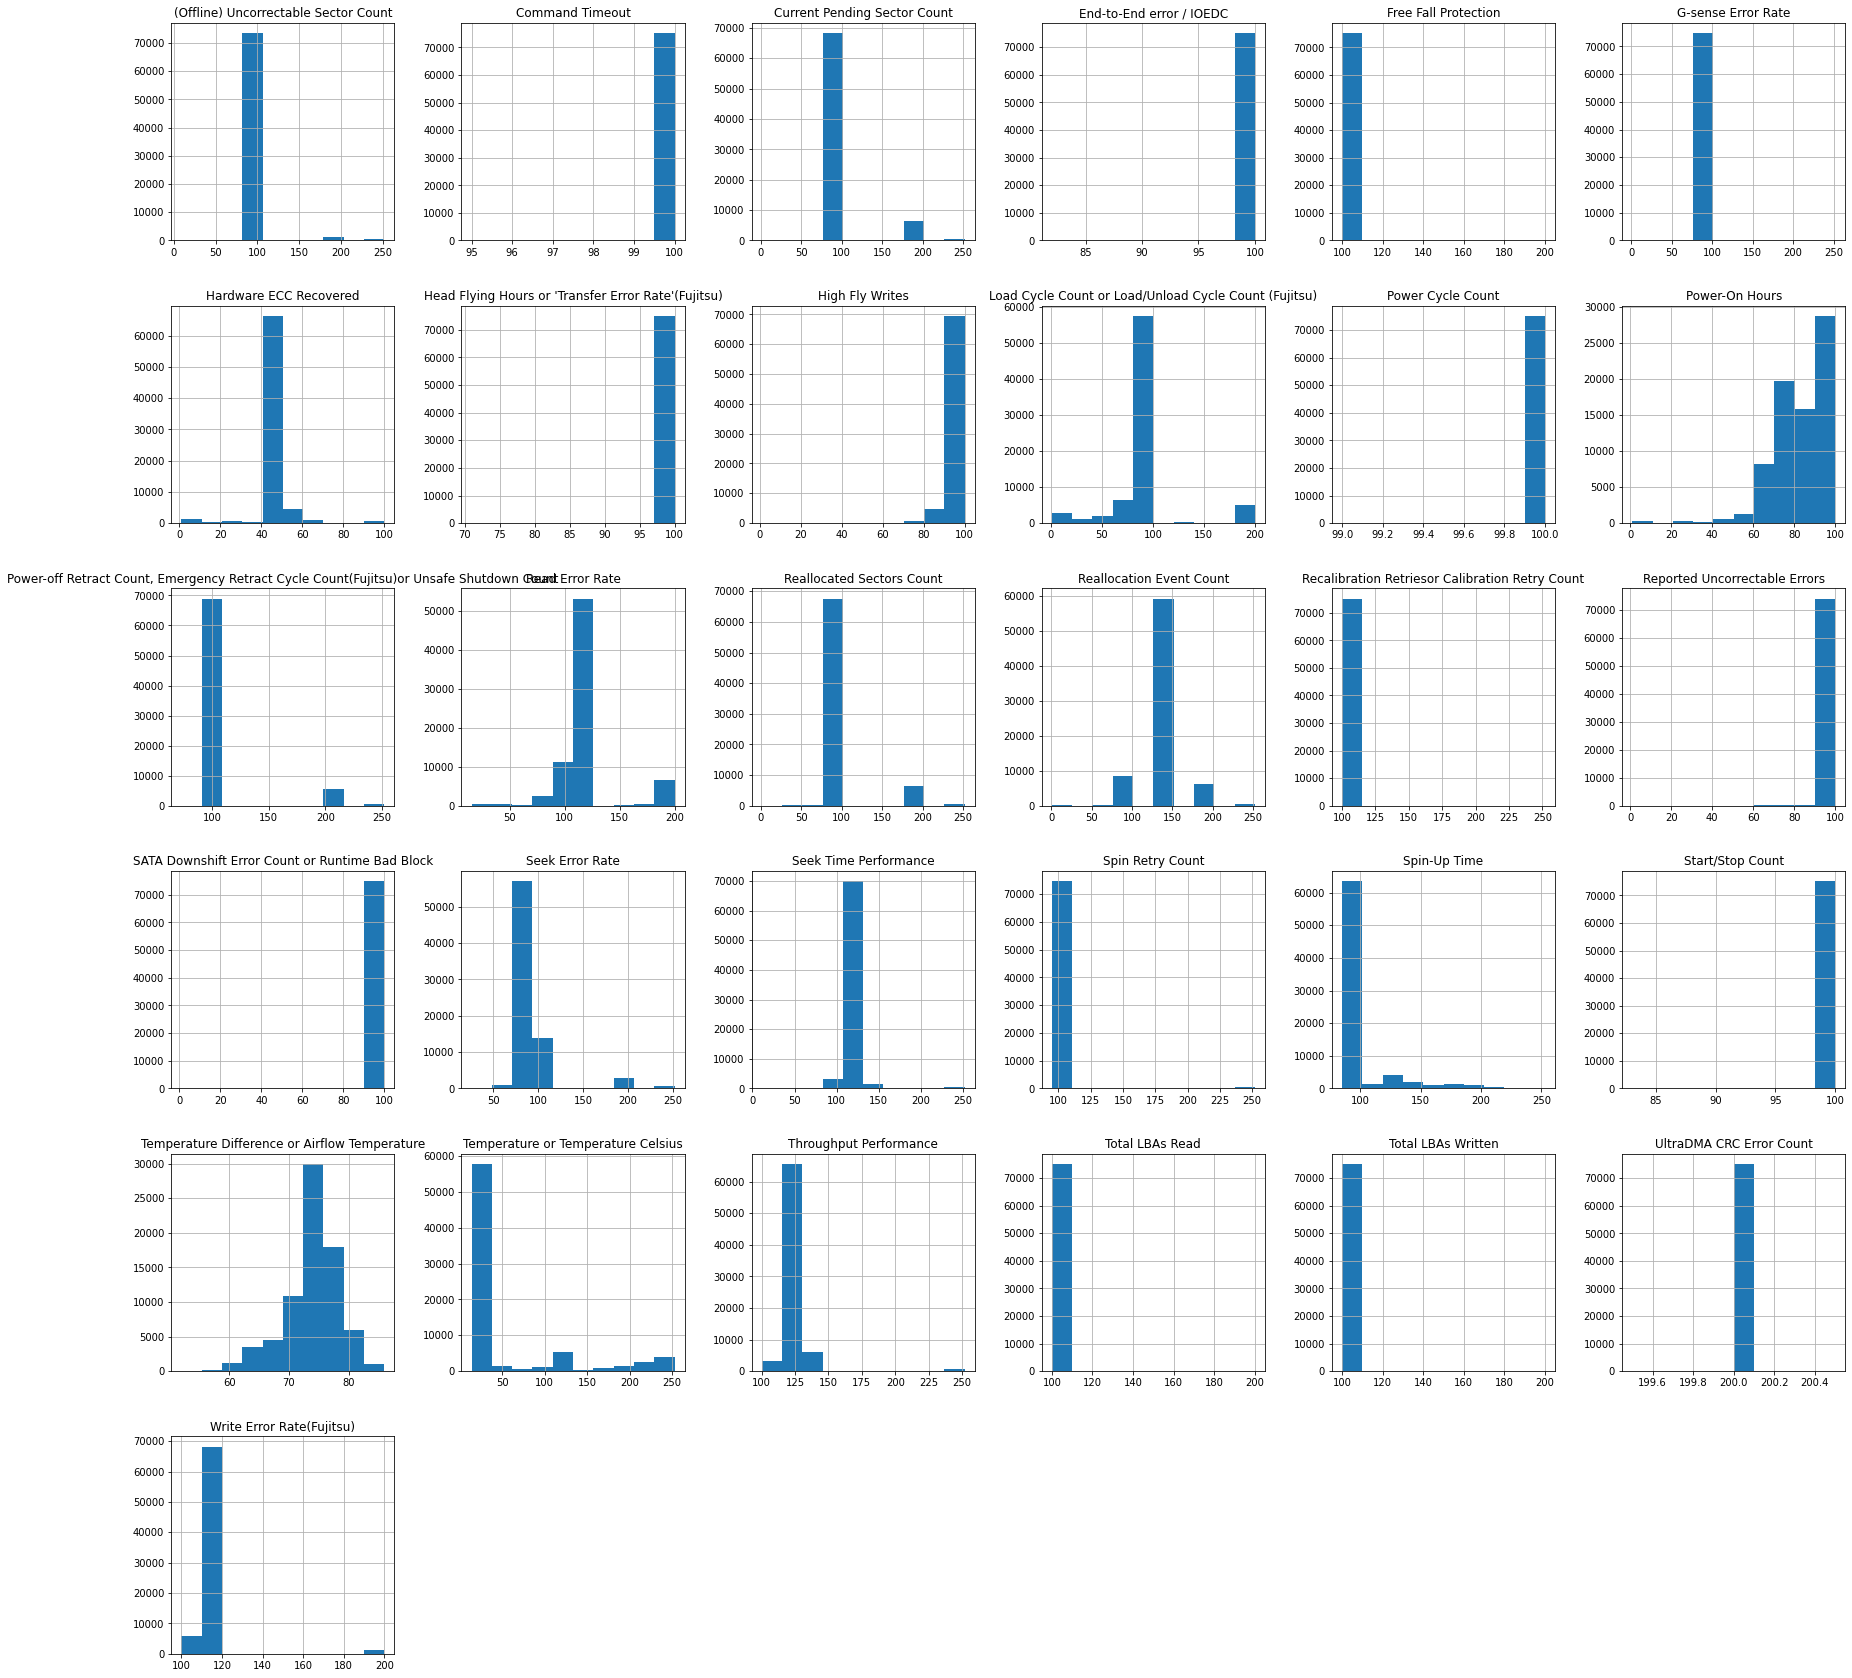

In [15]:
# Let us visualize to see how those data features are distributed.
pd.DataFrame.hist(df1, figsize=(30,30))

Distribution shows there are features that segmented in two or tree classes, features that just show their frequence of apparution in dataset, and features that are normaly distributed.

    - Features variables binomialy distributed  and those segmented in three classes are:
        - Failure
        - (Offline) Uncorrectable Sector Count
        - Current Pending Sector Count
        - Reallocated Sectors Count
        - Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count	
        - Reportered Uncorrectable Errors
        - Spin Retry Count
        
    - Features normally distributed:
        - Temperature Difference or Airflow Temperature
        - Seek Error Rate
        - Spin-Up Time	
        - Temperature or Temperature Celsius
        - Capacity Bytes
        - Read Error Rate
        - Load Cycle Count or Load/Unload Cycle Count (Fujitsu)
        - High Fly Writes
        - Power-On Hours	

In [16]:
# Let us firtly find out the range of each variable:
df1 = df.drop(['date', 'serial_number', 'model', 'capacity_bytes', 'failure'], axis=1) 
Minimum = df1.min()
Maximum = df1.max()
df_range = pd.concat([Minimum, Maximum], axis=1, keys=['Minimum', 'Maximum'])
df_range

,Minimum,Maximum
Throughput Performance,100.000000,252.0
Spin-Up Time,85.000000,253.0
Start/Stop Count,83.000000,100.0
Reallocated Sectors Count,1.000000,252.0
Seek Error Rate,26.000000,252.0
Seek Time Performance,11.000000,252.0
Power-On Hours,1.000000,100.0
Spin Retry Count,95.000000,252.0
Recalibration Retriesor Calibration Retry Count,100.000000,252.0
Power Cycle Count,99.000000,100.0


In [17]:
# Let us identify outliers using the LOF algorithms from Sklearn
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()

df1 = df.drop(['date', 'serial_number', 'model'], axis=1)

result = lof.fit_predict(df1)

In [18]:
# Adding the result column to the data
df['outlier_detected']=result
df.head(10)

,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,...,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Free Fall Protection,Read Error Rate,outlier_detected
0,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,130.084563,96.0,100.0,100.0,77.0,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,114.0,1
1,2016-01-01,PL2331LAGPRW3J,HGST HMS5C4040ALE640,4000787030016,0,134.000000,138.0,100.0,100.0,100.0,...,100.0,100.0,200.0,116.8415,99.950238,100.099998,100.099998,101.554268,100.0,-1
2,2016-01-01,Z300ZST1,ST4000DM000,4000787030016,0,130.084563,91.0,100.0,100.0,84.0,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,120.0,-1
3,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,130.084563,91.0,100.0,100.0,88.0,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,117.0,1
4,2016-01-01,WD-WMC4M2889605,WDC WD20EFRX,2000398934016,0,130.084563,100.0,100.0,200.0,100.0,...,200.0,100.0,200.0,100.0000,99.950238,100.099998,100.099998,101.554268,200.0,-1
5,2016-01-01,W300HHG5,ST4000DM000,4000787030016,0,130.084563,91.0,100.0,100.0,85.0,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,115.0,1
6,2016-01-01,W30074QA,ST4000DM000,4000787030016,0,130.084563,92.0,100.0,100.0,88.0,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,117.0,1
7,2016-01-01,WD-WX41D94RNE4X,WDC WD60EFRX,6001175126016,0,130.084563,100.0,100.0,200.0,200.0,...,200.0,100.0,200.0,100.0000,99.950238,100.099998,100.099998,101.554268,200.0,-1
8,2016-01-01,Z3010AN4,ST4000DM000,4000787030016,0,130.084563,98.0,100.0,100.0,87.0,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,117.0,1
9,2016-01-01,W300935A,ST4000DM000,4000787030016,0,130.084563,92.0,100.0,100.0,86.0,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,117.0,1


In the result column named as 'outlier_detected':
   - 1 is for the records which are clean 
   - -1 is for the records which are detected as outliers

In [19]:
# Let us drop capacity_bytes' and 'failure' to print out outliers 
df1= df.drop(['capacity_bytes', 'failure', 'model', 'serial_number'], axis=1)
# Let us print out outliers
df2 = df1.where(df1.outlier_detected==-1)
df2.dropna(inplace = True)
df2

,date,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,Power-On Hours,Spin Retry Count,Recalibration Retriesor Calibration Retry Count,...,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Free Fall Protection,Read Error Rate,outlier_detected
1,2016-01-01,134.000000,138.0,100.0,100.0,100.0,113.000000,99.0,100.0,100.720793,...,100.0,100.0,200.0,116.8415,99.950238,100.099998,100.099998,101.554268,100.000000,-1.0
2,2016-01-01,130.084563,91.0,100.0,100.0,84.0,120.649283,81.0,100.0,100.720793,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,120.000000,-1.0
4,2016-01-01,130.084563,100.0,100.0,200.0,100.0,120.649283,86.0,100.0,100.000000,...,200.0,100.0,200.0,100.0000,99.950238,100.099998,100.099998,101.554268,200.000000,-1.0
7,2016-01-01,130.084563,100.0,100.0,200.0,200.0,120.649283,89.0,100.0,100.000000,...,200.0,100.0,200.0,100.0000,99.950238,100.099998,100.099998,101.554268,200.000000,-1.0
11,2016-01-01,130.084563,91.0,100.0,100.0,85.0,120.649283,80.0,100.0,100.720793,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,108.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75107,2016-12-24,130.084563,185.0,100.0,200.0,200.0,120.649283,100.0,100.0,100.000000,...,200.0,100.0,200.0,100.0000,99.950238,100.099998,100.099998,101.554268,100.000000,-1.0
75121,2016-12-24,130.084563,199.0,100.0,200.0,100.0,120.649283,76.0,100.0,100.000000,...,200.0,100.0,200.0,100.0000,99.950238,100.099998,100.099998,101.554268,171.290065,-1.0
75123,2016-12-24,130.084563,99.0,100.0,100.0,79.0,120.649283,98.0,100.0,100.720793,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,171.129722,-1.0
75128,2016-12-24,130.084563,93.0,100.0,100.0,75.0,120.649283,99.0,100.0,100.720793,...,100.0,100.0,200.0,116.8415,100.000000,100.000000,100.000000,101.554268,114.000000,-1.0


In [20]:
# Let us print out data without outliers:
df = df[df.outlier_detected == 1]
df

,date,serial_number,model,capacity_bytes,failure,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,...,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Free Fall Protection,Read Error Rate,outlier_detected
0,2016-01-01,Z304AESX,ST4000DM000,4000787030016,0,130.084563,96.0,100.0,100.0,77.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,114.000000,1
3,2016-01-01,Z300GQ9R,ST4000DM000,4000787030016,0,130.084563,91.0,100.0,100.0,88.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,117.000000,1
5,2016-01-01,W300HHG5,ST4000DM000,4000787030016,0,130.084563,91.0,100.0,100.0,85.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,115.000000,1
6,2016-01-01,W30074QA,ST4000DM000,4000787030016,0,130.084563,92.0,100.0,100.0,88.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,117.000000,1
8,2016-01-01,Z3010AN4,ST4000DM000,4000787030016,0,130.084563,98.0,100.0,100.0,87.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,117.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75122,2016-12-24,Z300ZR58,ST4000DM000,4000787030016,0,130.084563,91.0,100.0,100.0,74.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,119.000000,1
75124,2016-12-24,Z300ZV0C,ST4000DM000,4000787030016,0,130.084563,95.0,100.0,100.0,87.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,119.000000,1
75125,2016-12-24,ZA12B3RT,ST8000DM002,8001563222016,1,130.084563,98.0,100.0,100.0,89.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,171.915576,1
75126,2016-12-24,ZA12PTR5,ST8000DM002,8001563222016,0,130.084563,99.0,100.0,100.0,87.0,...,100.0,100.0,200.0,116.8415,100.0,100.0,100.0,101.554268,79.000000,1


Text(0.5, 1.0, 'Evolution of SATA Downshift Error Count or Runtime Bad Block over time')

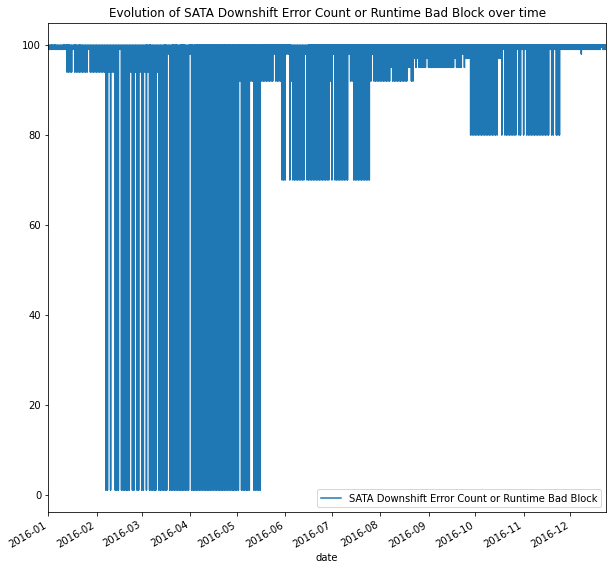

In [21]:
# plot the data
fig, ax = plt.subplots(figsize=(10,10))
ax1 = ax
df.plot(x='date', y='SATA Downshift Error Count\xa0or\xa0Runtime Bad Block', ax= ax1).set_title('Evolution of SATA Downshift Error Count or Runtime Bad Block over time')

#### Rolling median outlier detection

In [22]:
#set the constants you need
consistency_const = 1.4826
thresh = 3

#rolling median calculation
df['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block'] = df['SATA Downshift Error Count\xa0or\xa0Runtime Bad Block'].rolling(20, center=True).median()

#rolling MAD calculation
df['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block_diff'] = abs(df['SATA Downshift Error Count\xa0or\xa0Runtime Bad Block']-df['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block'])
df['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block_mad'] = df['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block_diff'].rolling(20,center=True).median()

#rolling modified z-score calculation
df['rolling_z_score'] = pd.to_numeric((df['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block_diff']/(df['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block_mad']*consistency_const)) > thresh)

In [23]:
df.dropna(inplace=True)

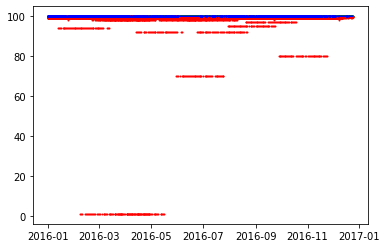

In [24]:
normal = df[df.rolling_z_score == 0]
anomaly = df[df.rolling_z_score == 1]

#normal data as green points
plt.plot_date(normal.date, normal['SATA Downshift Error Count\xa0or\xa0Runtime Bad Block'], color='green',markersize=0.5)
#anomalies as red points
plt.plot_date(anomaly.date, anomaly['SATA Downshift Error Count\xa0or\xa0Runtime Bad Block'], color='red',markersize=1)
#rolling median as blue line
plt.plot_date(df['date'],df['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block'], color='blue',linestyle='solid', marker='None')
# You may get a futurewarning about the date conversion.

Text(0.5, 1.0, 'Evolution of Seek Error Rate over time')

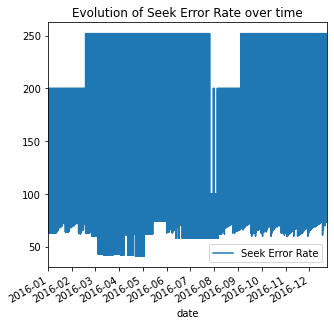

In [25]:
# plot the data
fig, ax = plt.subplots(figsize=(5,5))
ax1 = ax
df.plot(x='date', y='Seek Error Rate', ax= ax1).set_title('Evolution of Seek Error Rate over time')

In [26]:
#set the constants you need
consistency_const = 1.4826
thresh = 3

#rolling median calculation
df['median Seek Error Rate'] = df['Seek Error Rate'].rolling(20, center=True).median()

#rolling MAD calculation
df['median Seek Error Rate_diff'] = abs(df['Seek Error Rate']-df['median Seek Error Rate'])
df['median Seek Error Rate_mad'] = df['median Seek Error Rate_diff'].rolling(20,center=True).median()

#rolling modified z-score calculation
df['rolling_z_score'] = pd.to_numeric((df['median Seek Error Rate_diff']/(df['median Seek Error Rate_mad']*consistency_const)) > thresh)

In [27]:
df.dropna(inplace=True)

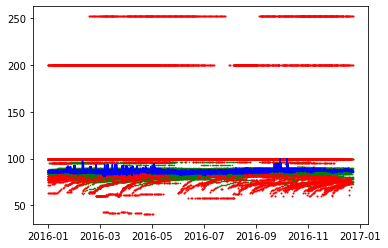

In [28]:
normal = df[df.rolling_z_score == 0]
anomaly = df[df.rolling_z_score == 1]

#normal data as green points
plt.plot_date(normal.date, normal['Seek Error Rate'], color='green',markersize=0.5)
#anomalies as red points
plt.plot_date(anomaly.date, anomaly['Seek Error Rate'], color='red',markersize=1)
#rolling median as blue line
plt.plot_date(df['date'],df['median Seek Error Rate'], color='blue',linestyle='solid', marker='None')
# You may get a futurewarning about the date conversion.

Let us check outliers presence by the box plot visualization to deeply understand features behavior.

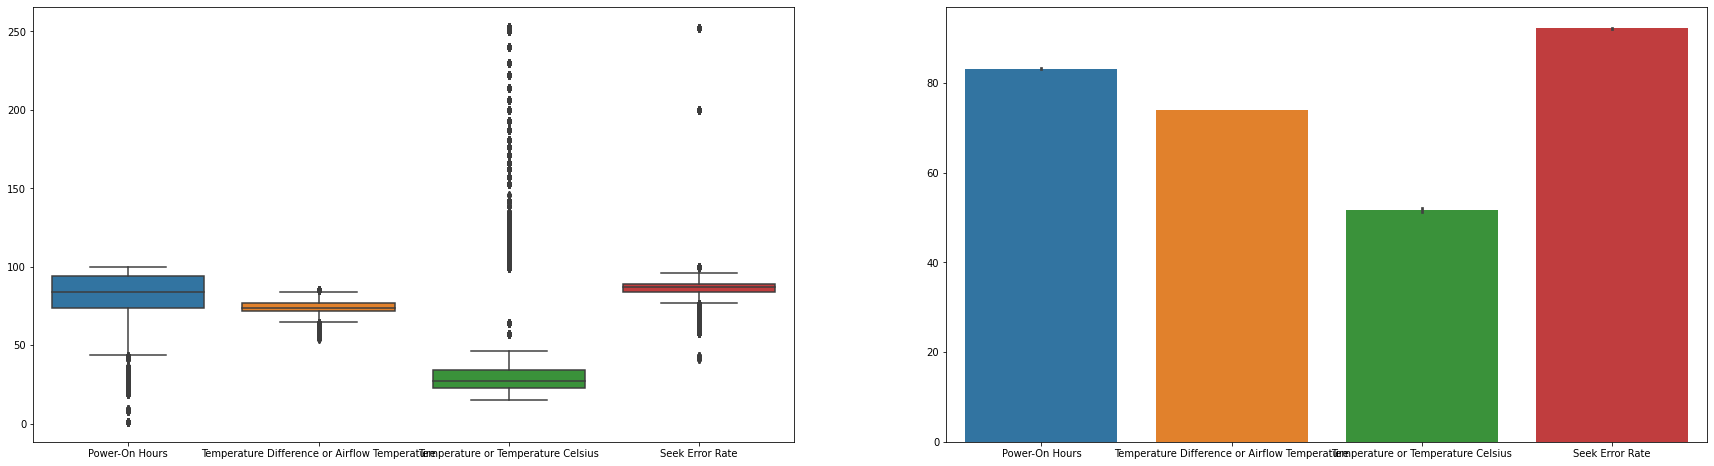

In [29]:
#  Are there outliers, show the variables are related etc.
fig, ax = plt.subplots(1, 2, figsize =(30,8))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Power-On Hours', 'Temperature Difference\xa0or\xa0Airflow Temperature', 'Temperature\xa0or\xa0Temperature Celsius', 'Seek Error Rate']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Power-On Hours', 'Temperature Difference\xa0or\xa0Airflow Temperature', 'Temperature\xa0or\xa0Temperature Celsius', 'Seek Error Rate']], orient = 'v', ax= ax2);

We can notice the presence of outliers in features distribution. Furthermore there is great difference between the distribution of the minimum features and the maximum features. This makes reasonable to think of outliers presence. But we cannot drop those outliers because there iare part of our interest.

Let us check outliers presence by the box plot visualization to deeply understand features behavior.

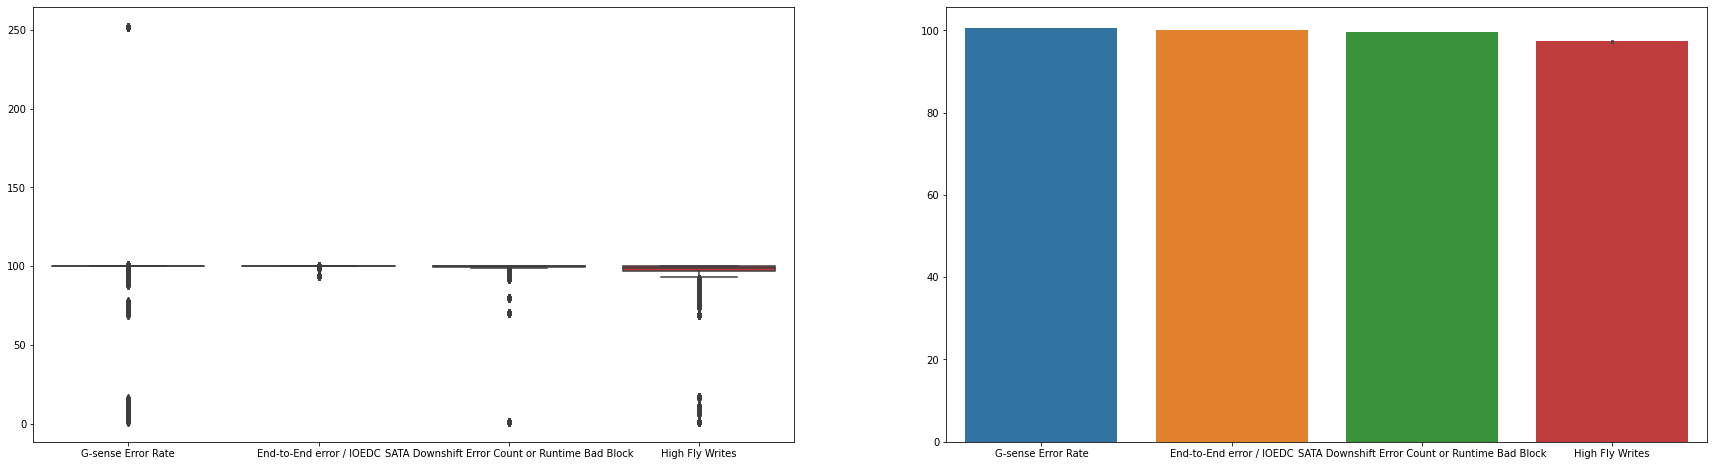

In [30]:
#  How is it distributed, are there outliers, show the variables are related etc.
fig, ax = plt.subplots(1, 2, figsize =(30,8))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['G-sense Error Rate', 'End-to-End error / IOEDC', 'SATA Downshift Error Count\xa0or\xa0Runtime Bad Block', 'High Fly Writes']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['G-sense Error Rate', 'End-to-End error / IOEDC', 'SATA Downshift Error Count\xa0or\xa0Runtime Bad Block', 'High Fly Writes']], orient = 'v', ax= ax2);

We can notice the presence of outliers in features distribution. Furthermore there is great difference between the distribution of the minimum features and the maximum features. This makes reasonable to think of outliers presence. But we cannot drop those outliers because there iare part of our interest.

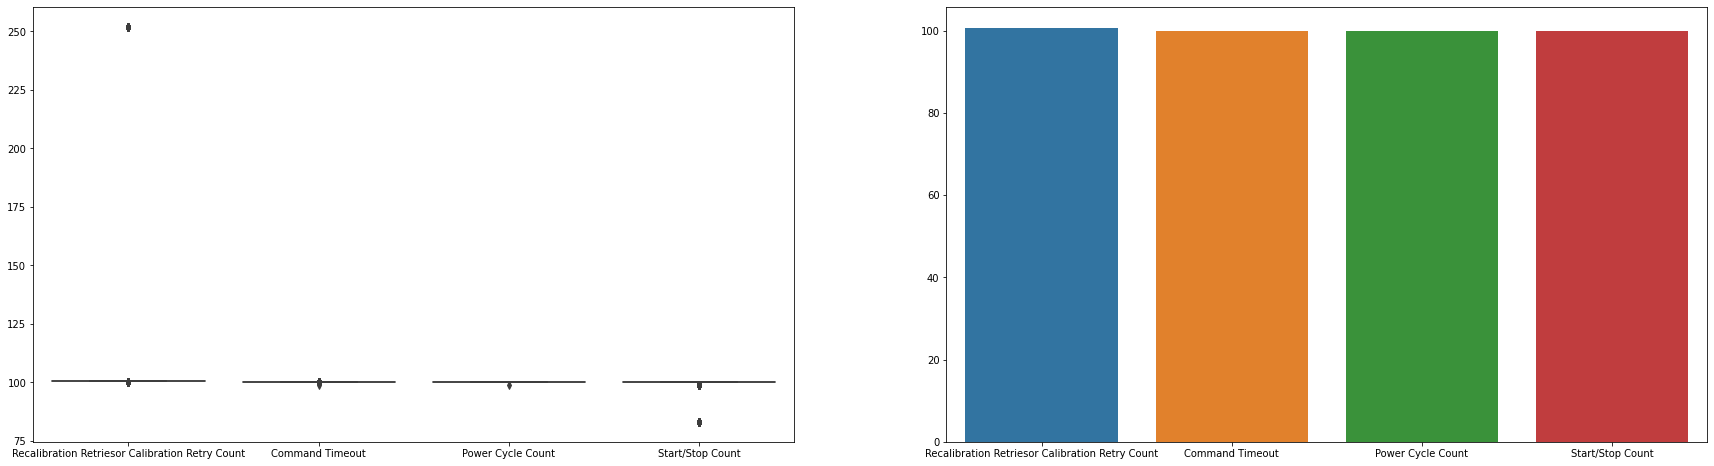

In [31]:
# Are there outliers, show the variables are related etc.
fig, ax = plt.subplots(1, 2, figsize =(30,8))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Recalibration Retriesor\xa0Calibration Retry Count', 'Command Timeout','Power Cycle Count', 'Start/Stop Count']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Recalibration Retriesor\xa0Calibration Retry Count', 'Command Timeout','Power Cycle Count', 'Start/Stop Count']], orient = 'v', ax= ax2);

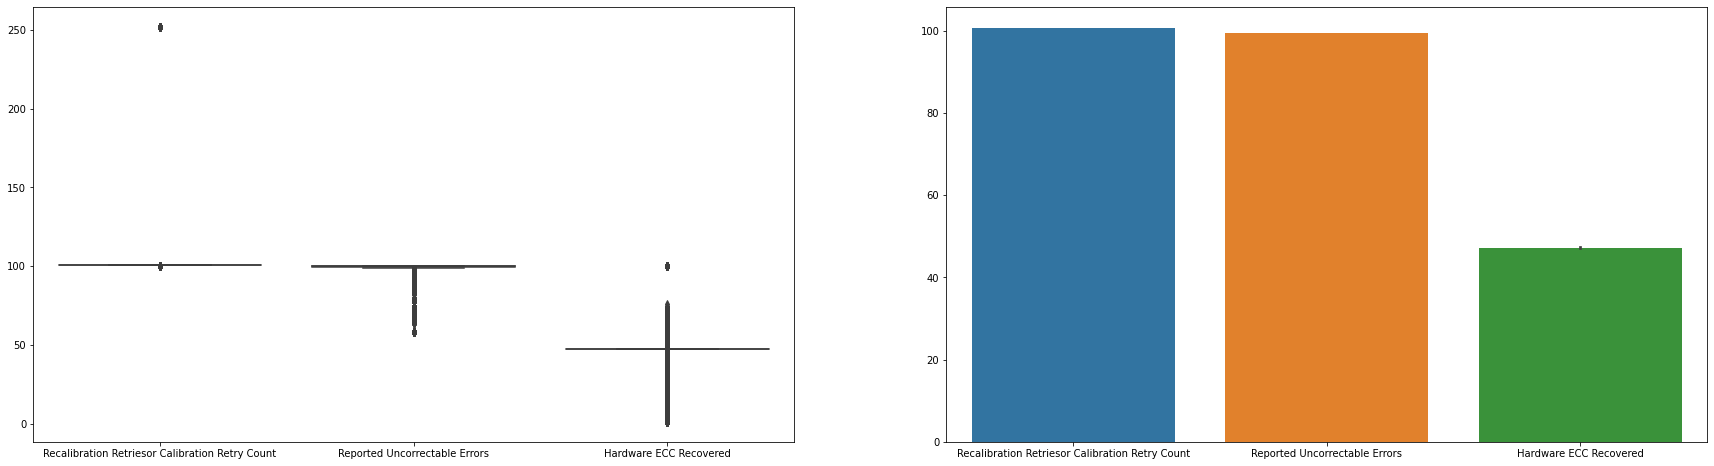

In [32]:
#  Are there outliers, show the variables are related etc.
fig, ax = plt.subplots(1, 2, figsize =(30,8))
(ax1, ax2)=ax
sns.boxplot(data=df.loc[:,['Recalibration Retriesor\xa0Calibration Retry Count', 'Reported Uncorrectable Errors', 'Hardware ECC Recovered']], orient = 'v', ax= ax1)

sns.barplot(data=df.loc[:,['Recalibration Retriesor\xa0Calibration Retry Count', 'Reported Uncorrectable Errors', 'Hardware ECC Recovered']], orient = 'v', ax= ax2);


We can notice the presence of outliers in features distribution. Furthermore there is great difference between the distribution of the minimum features and the maximum features. This makes reasonable to think of outliers presence. But we cannot drop those outliers because there iare part of our interest.

In [33]:
df.drop(['median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block_diff', 'median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block_mad', 'outlier_detected',
'median SATA Downshift Error Count\xa0or\xa0Runtime Bad Block', 'median Seek Error Rate_diff', 'UltraDMA CRC Error Count', 'median Seek Error Rate_mad', 'median Seek Error Rate', 'rolling_z_score'], axis =1, inplace = True)

## Task 3 Feature engineering

Here we are going use matrix correlation of the features to explore highly correlated variables before we remove the highly correlated ones and then proceed to the feature selection.

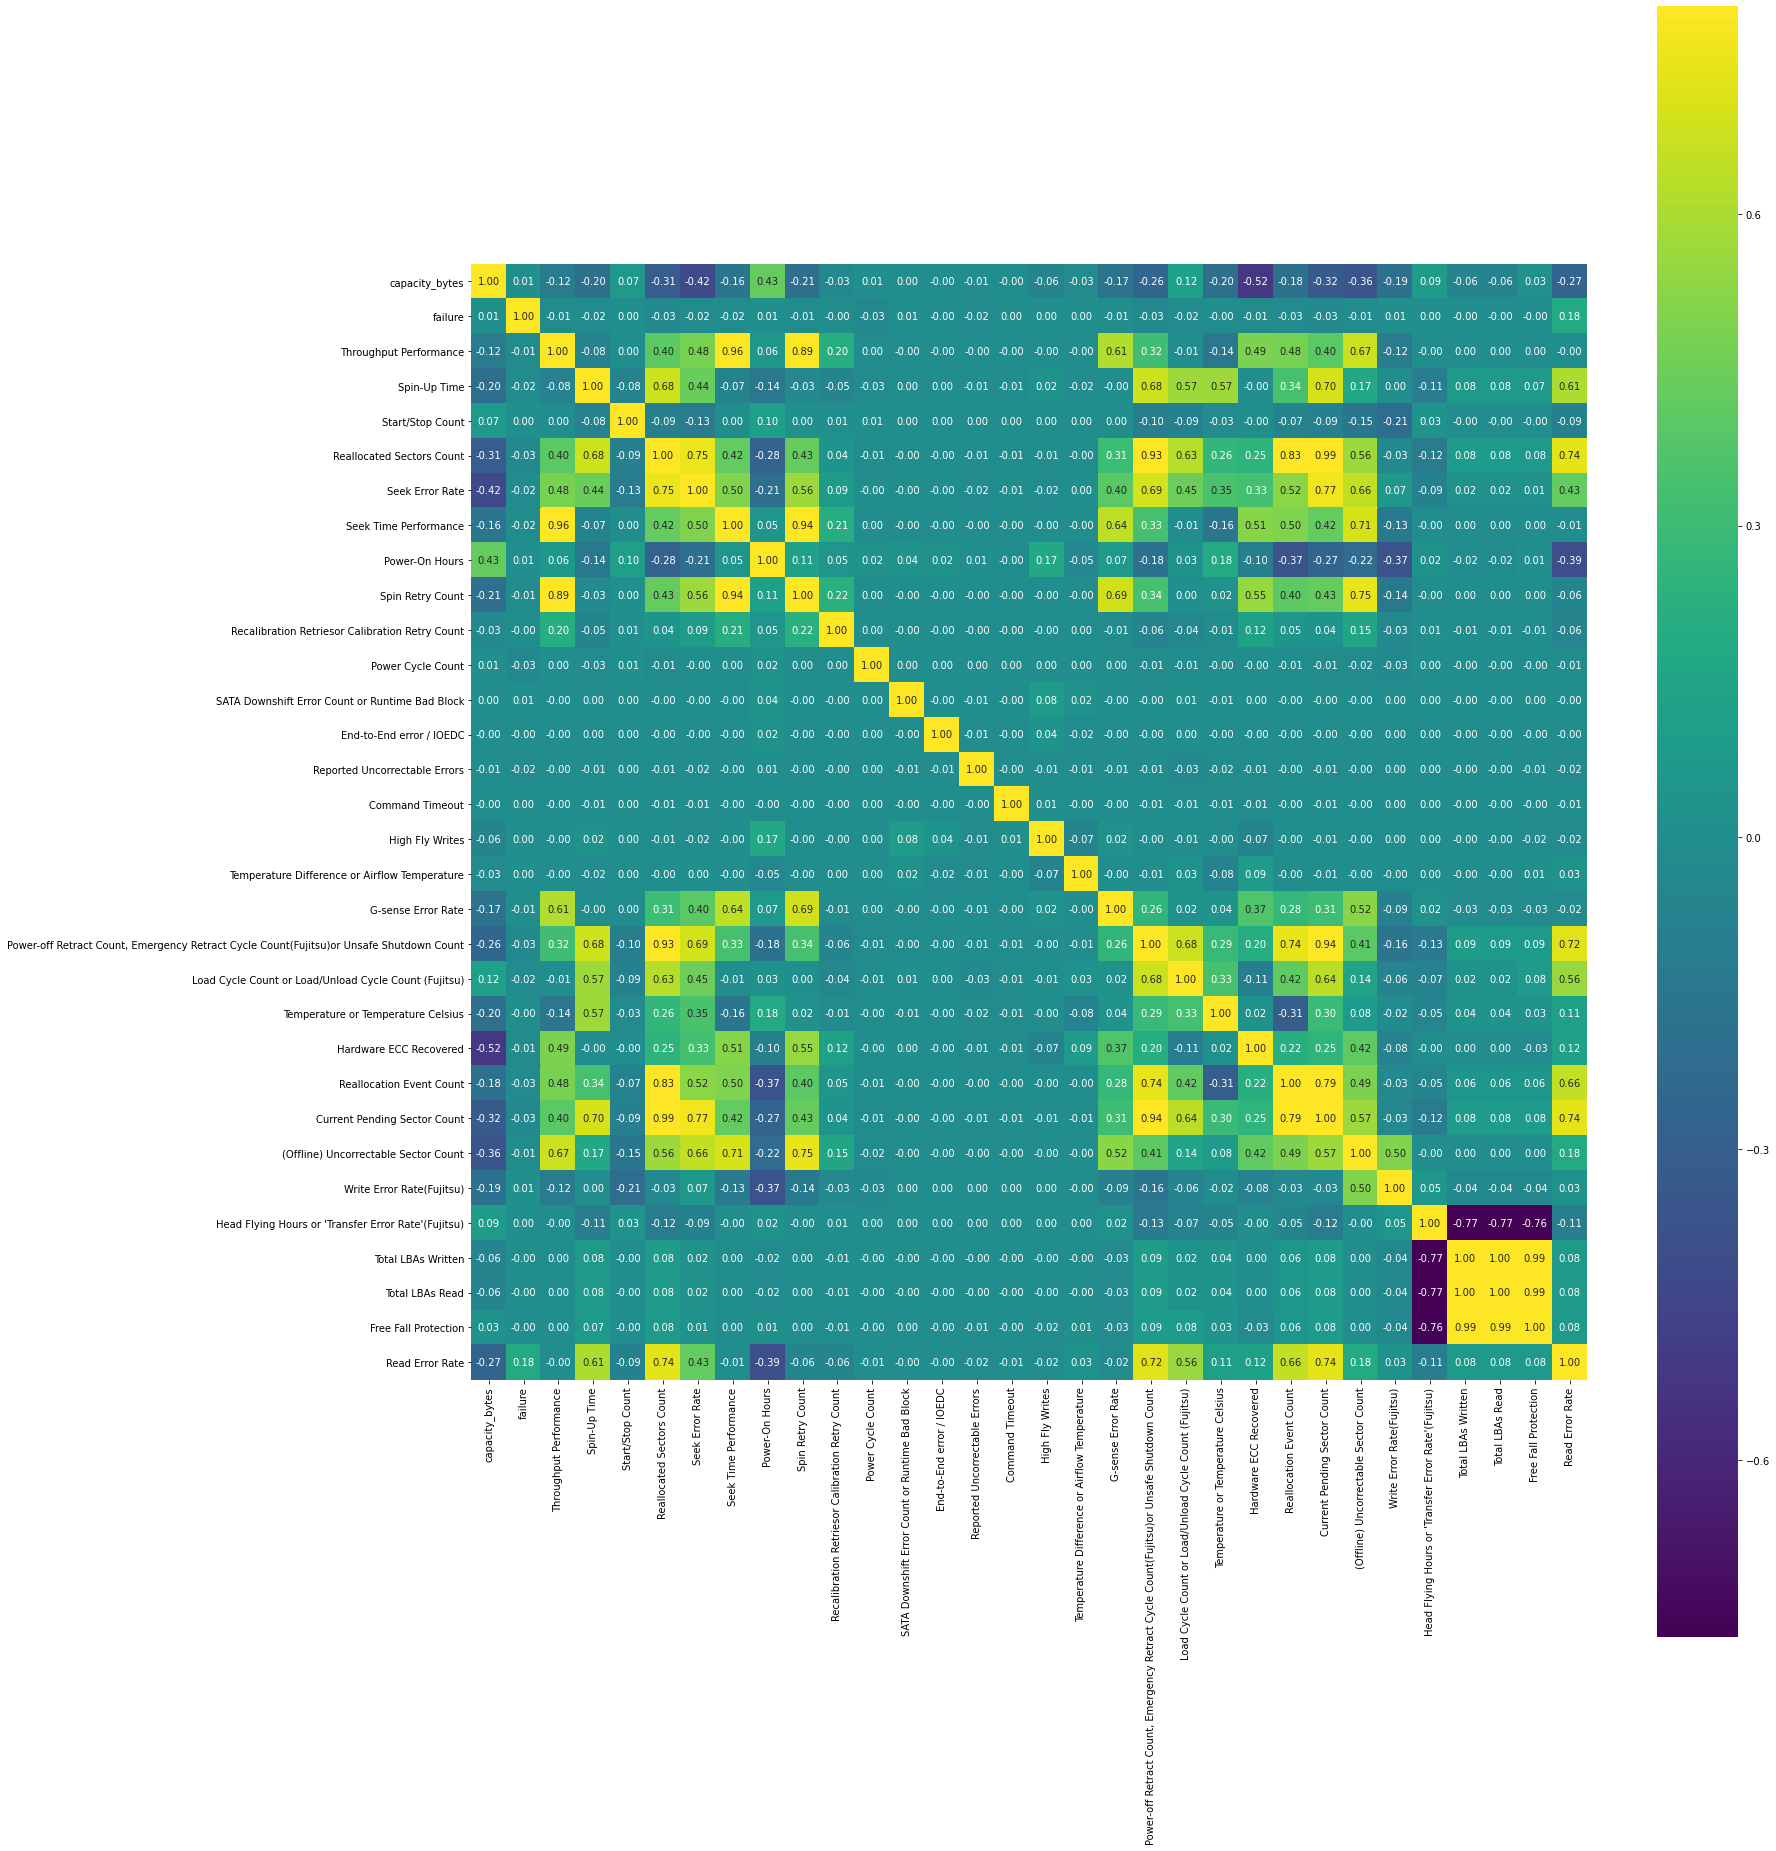

In [34]:
# Let us plot heatmap correlationa matrix
plt.subplots(figsize=(25, 30))
corrmat= df.corr()
sns.heatmap(corrmat, cbar=True,  vmax=.8,annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            cmap='viridis', linecolor="white")

As we saw above there are few feature which shows high multicollinearity from heatmap. Lets focus on yellow squares on diagonal line and few on the sides.    
    
    - Seek Time Performance and Spin Retry Count
    - Throughput Performance and Spin Retry Count
    - Throughput Performance and Seek Time Performance
    - (Offline) Uncorrectable Sector Count and Seek Time Performance
    - (Offline) Uncorrectable Sector Count and Spin Retry Count
    
    - Current Pending Sector Count and Seek Error Rate
    - Reallocated Sectors Count and Current Pending Sector Count
    - Current Pending Sector Count and Spin-Up Time
    - Reallocated Sectors Count and Reallocation Event Count
    - Reallocated Sectors Count and Seek Error Rate
    - Reallocated Sectors Count and Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count
    - Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count and Reallocation Event Count
    - Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count and Current Pending Sector Count
    - Reallocation Event Count and Current Pending Sector Count
    - Read Error Rate and Current Pending Sector Count
    - Read Error Rate and Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu)or Unsafe Shutdown Count
    - Read Error Rate and Reallocated Sectors Count
    
    - Free Fall Protection and Total LBAs Read
    - Free Fall Protection and Total LBAs Written
    - Free Fall Protection and Head Flying Hours or 'Transfer Error Rate'(Fujitsu)
    - Total LBAs Written and Head Flying Hours or 'Transfer Error Rate'(Fujitsu)
    - Total LBAs Read and Head Flying Hours or 'Transfer Error Rate'(Fujitsu)
    - Total LBAs Read and Total LBAs Written
We have to create a single feature from them before we use them as predictors.

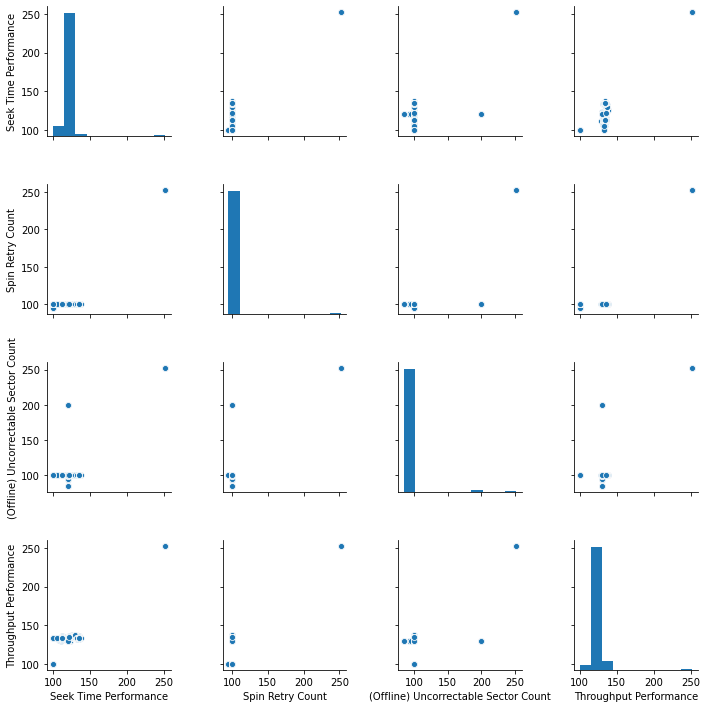

In [35]:
cols = ['Seek Time Performance', 'Spin Retry Count', '(Offline) Uncorrectable Sector Count', 'Throughput Performance']
sns.pairplot(df[cols])

Below here are the features we are going to use:
    
    - Seek Time Performance 
    - (Offline) Uncorrectable Sector Count

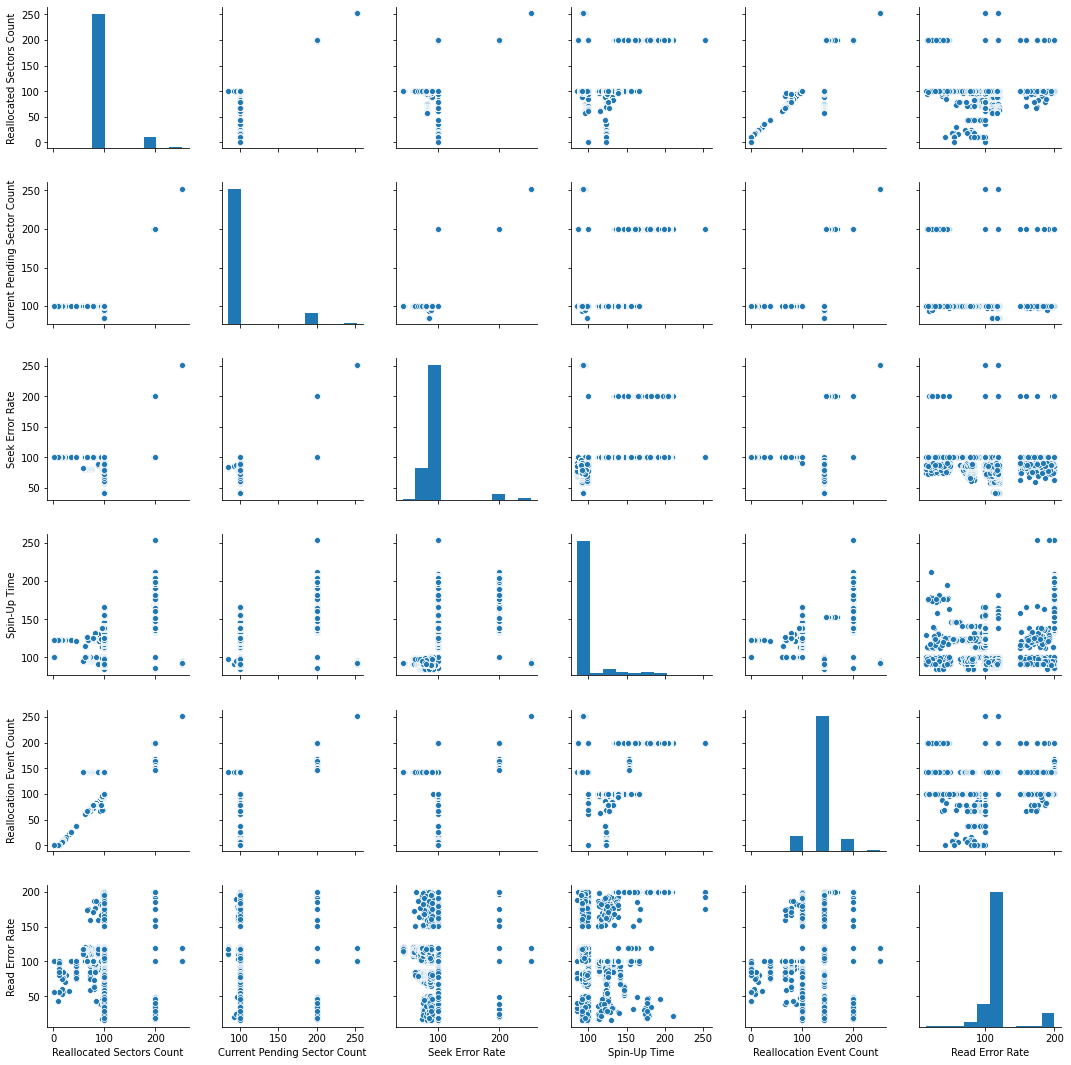

In [36]:
cols = ['Reallocated Sectors Count', 'Current Pending Sector Count', 'Seek Error Rate', 'Spin-Up Time', 'Reallocation Event Count',
        'Read Error Rate']
sns.pairplot(df[cols])

Let us proceed to the choice of features:

    - Reallocation Event Count
    - Read Error Rate
    - Spin-Up Time

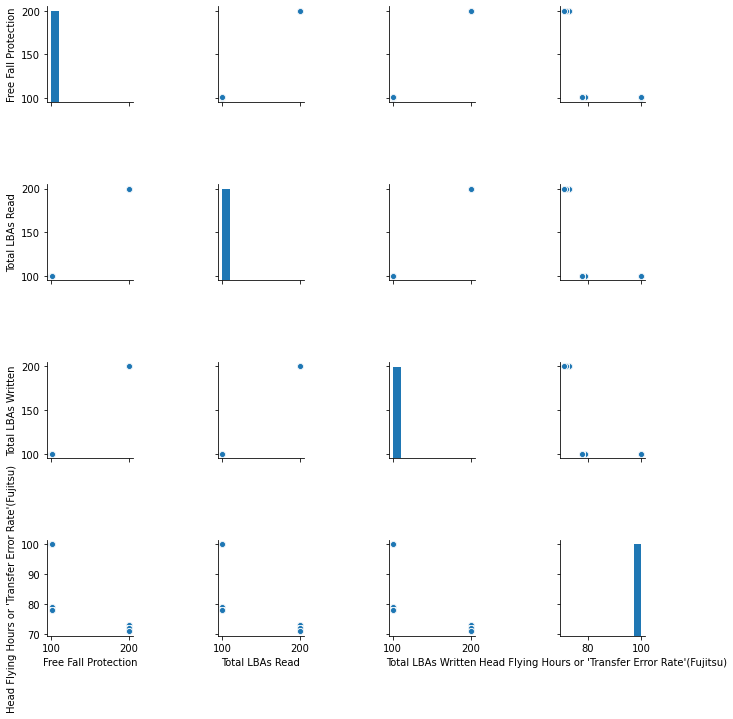

In [37]:
cols = ['Free Fall Protection', 'Total LBAs Read', 'Total LBAs Written', "Head Flying Hours\xa0or 'Transfer Error Rate'(Fujitsu)"]
sns.pairplot(df[cols])

Let us proceed to the choice of :
   
    - Head Flying Hours or 'Transfer Error Rate'(Fujitsu)
   

We are going to drop highly correlated features, and continue our analysis, on the rest. And below here are the features we are going to drop:
    
    - UltraDMA CRC Error Count
    - Write Error Rate(Fujitsu)
    - Total LBAs Written	
    - Total LBAs Read	
    - Seek Error Rate	
    - Reallocation Sectors Count	
    - Throughput Performance
    - Current Pending Sector Count
    - Spin Retry Count
    - Free Fall Protection
    - Power-off Retract Count, Emergency Retract Cycle Count(Fujitsu) or Unsafe Shutdown Count

In [38]:
# Now let us drop those features:
df.drop([ 'Reallocated Sectors Count', 'Spin Retry Count', 'Spin-Up Time', 'Throughput Performance', 'Current Pending Sector Count', 'Seek Error Rate', 
         'Total LBAs Read', 'Total LBAs Written', 'Load Cycle Count\xa0or\xa0Load/Unload Cycle Count\xa0(Fujitsu)', 'Power-off Retract Count,\xa0Emergency Retract Cycle Count(Fujitsu)or\xa0Unsafe Shutdown Count',
        'Free Fall Protection'], axis =1, inplace = True)

In [39]:
df1 = df.drop(['capacity_bytes', 'failure' ], axis=1)

In [40]:
df.shape

(67541, 24)

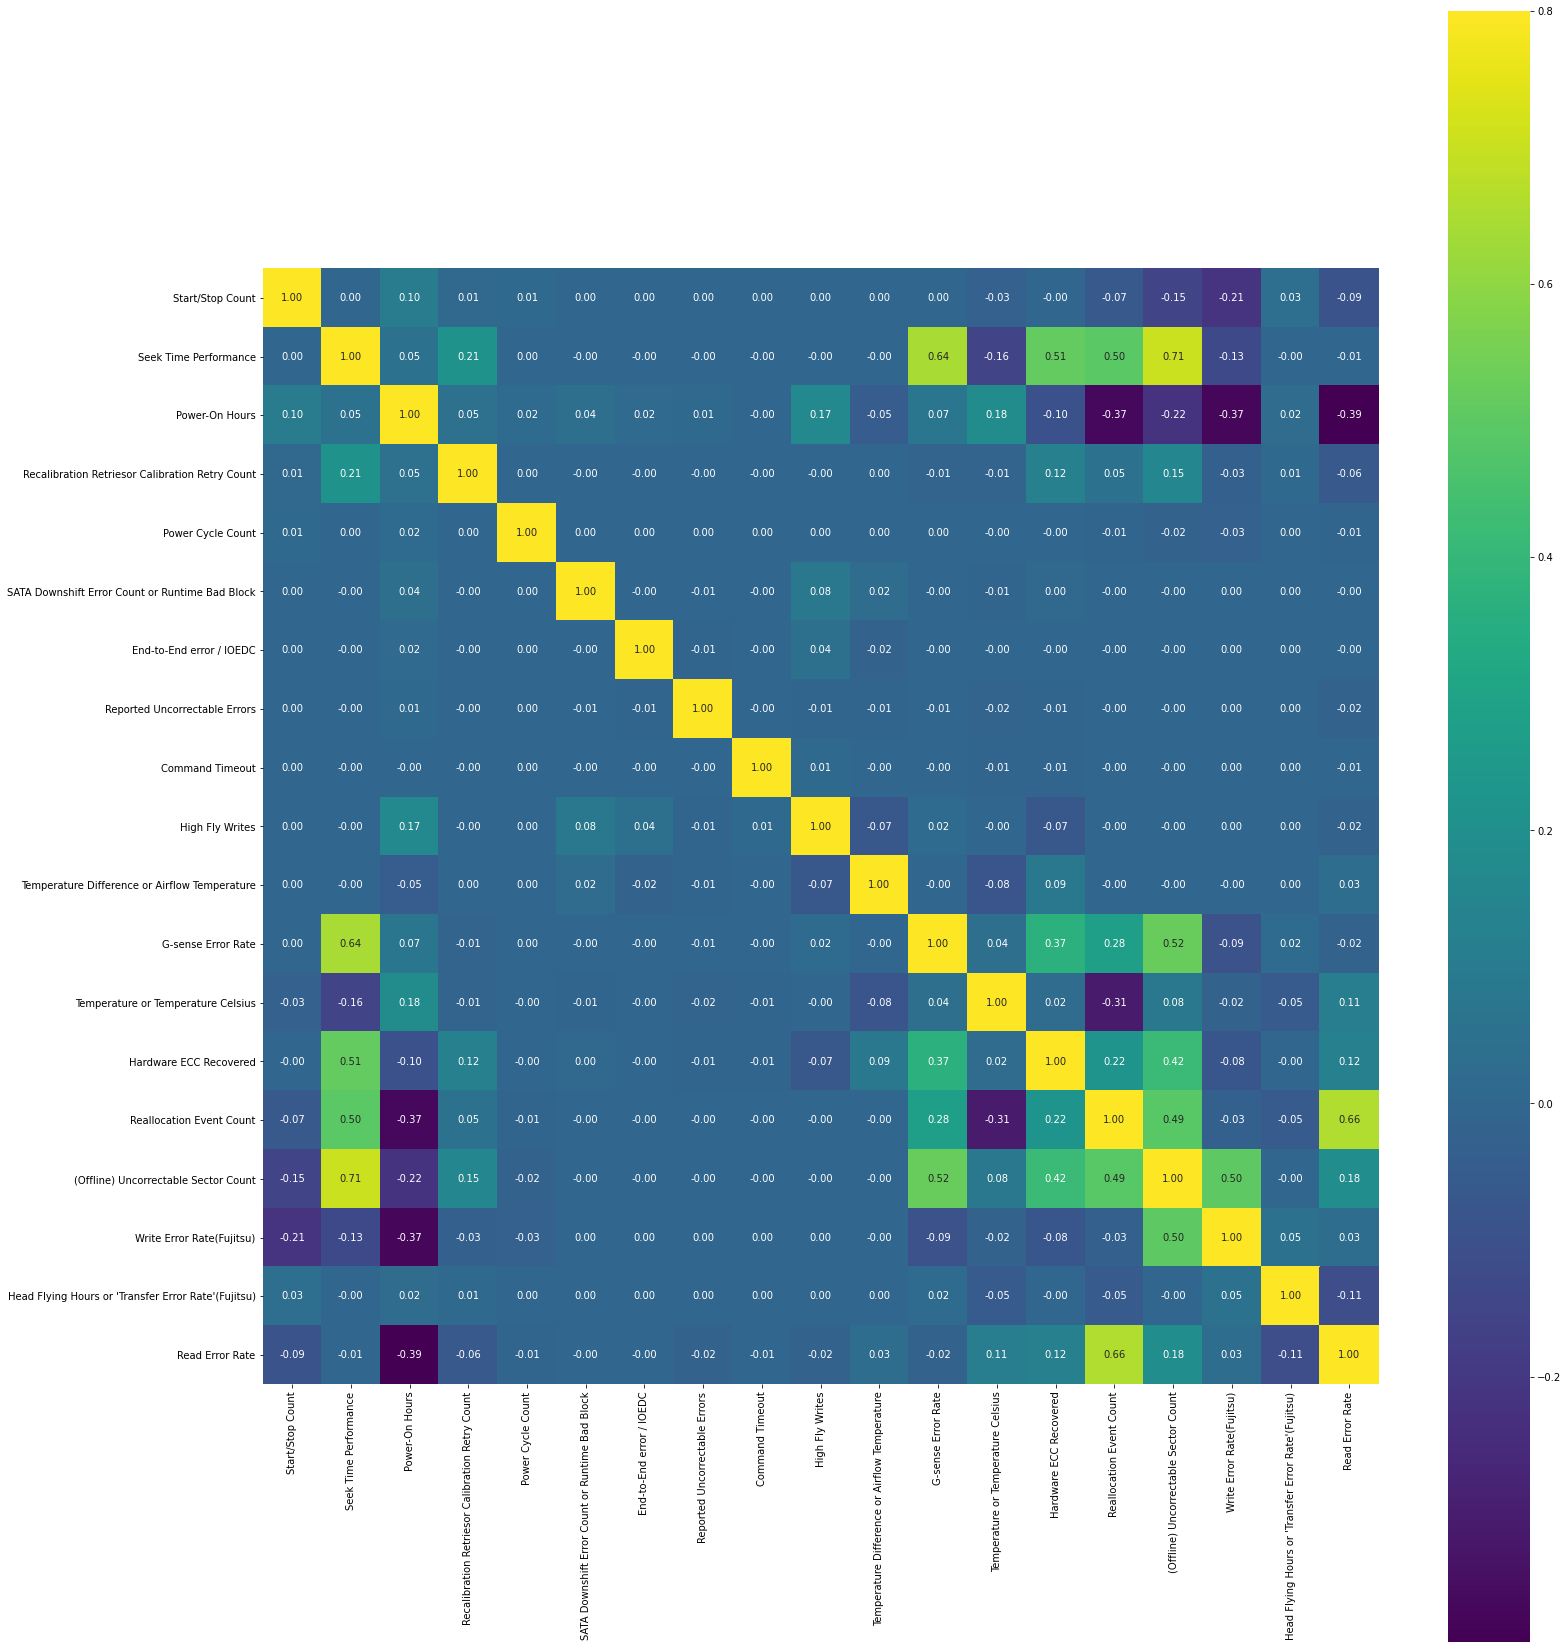

In [41]:
# Let us plot heatmap correlationa matrix
plt.subplots(figsize=(25, 30))
corrmat= df1.corr()
sns.heatmap(corrmat, cbar=True,  vmax=.8,annot=True, square=True, fmt='.2f', annot_kws={'size': 10},\
            cmap='viridis', linecolor="white")

#### Features selection:

The features that are to be exploited are those with low correlation coefficient:
    
    - Start/Stop Count
    - Hardware ECC Recovered
    - Seek Error Rate	
    - Power-On Hours
	- Recalibration Retriesor Calibration Retry Count
    - Power Cycle Count
    - SATA Downshift Error Count or Runtime Bad Block
    - End-to-End error / IOEDC
    - Reported Uncorrectable Errors
    - Command Timeout
    - High Fly Writes
    - Reallocation Event Count
    - Read Error Rate
    - Spin-Up Time
    - Temperature Difference or Airflow Temperature
    - Temperature or Temperature Celsius
    - Head Flying Hours or 'Transfer Error Rate'(Fujitsu)
    - Seek Time Performance 
    - (Offline) Uncorrectable Sector Count
    - G-sense Error Rate
    - capacity_bytes
    - failure
	

Let us produce some plots that help you to understand the structure of the S.M.A.R.T variables.

Text(0.5, 1.0, 'Evolution of G-sense Error Rate overtime')

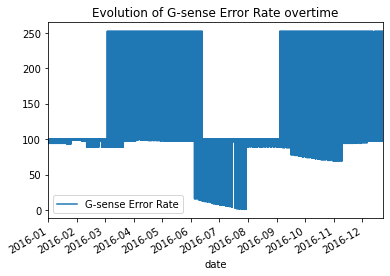

In [42]:
# plot the Evolution of G-sense Error Rate with time
df.plot(x='date', y='G-sense Error Rate').set_title('Evolution of G-sense Error Rate overtime')

Text(0.5, 1.0, 'Evolution of High Fly Writes overtime')

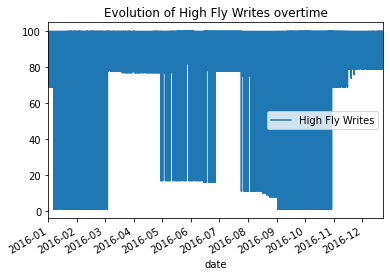

In [43]:
# plot the Evolution of High Fly Writes with time
df.plot(x='date', y='High Fly Writes').set_title('Evolution of High Fly Writes overtime')

Text(0.5, 1.0, 'Evolution of Command Timeout overtime')

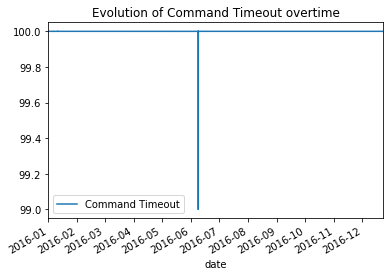

In [44]:
# plot the Evolution of Command Timeout with time
df.plot(x='date', y='Command Timeout').set_title('Evolution of Command Timeout overtime')

Text(0.5, 1.0, 'Evolution of Reported Uncorrectable Errors overtime')

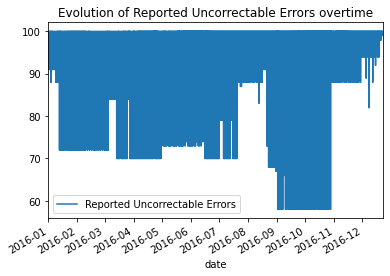

In [45]:
# plot the Evolution of Reported Uncorrectable Errors with time
df.plot(x='date', y='Reported Uncorrectable Errors').set_title('Evolution of Reported Uncorrectable Errors overtime')

Text(0.5, 1.0, 'Evolution of End-to-End error / IOEDC overtime')

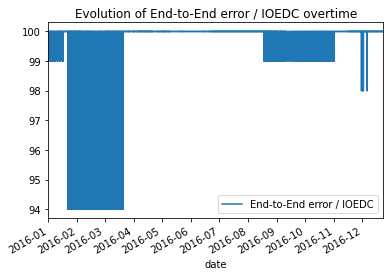

In [46]:
# plot the Evolution of End-to-End error / IOEDC with time
df.plot(x='date', y='End-to-End error / IOEDC').set_title('Evolution of End-to-End error / IOEDC overtime')

Text(0.5, 1.0, 'Evolution of Recalibration Retries or Calibration Retry Count overtime')

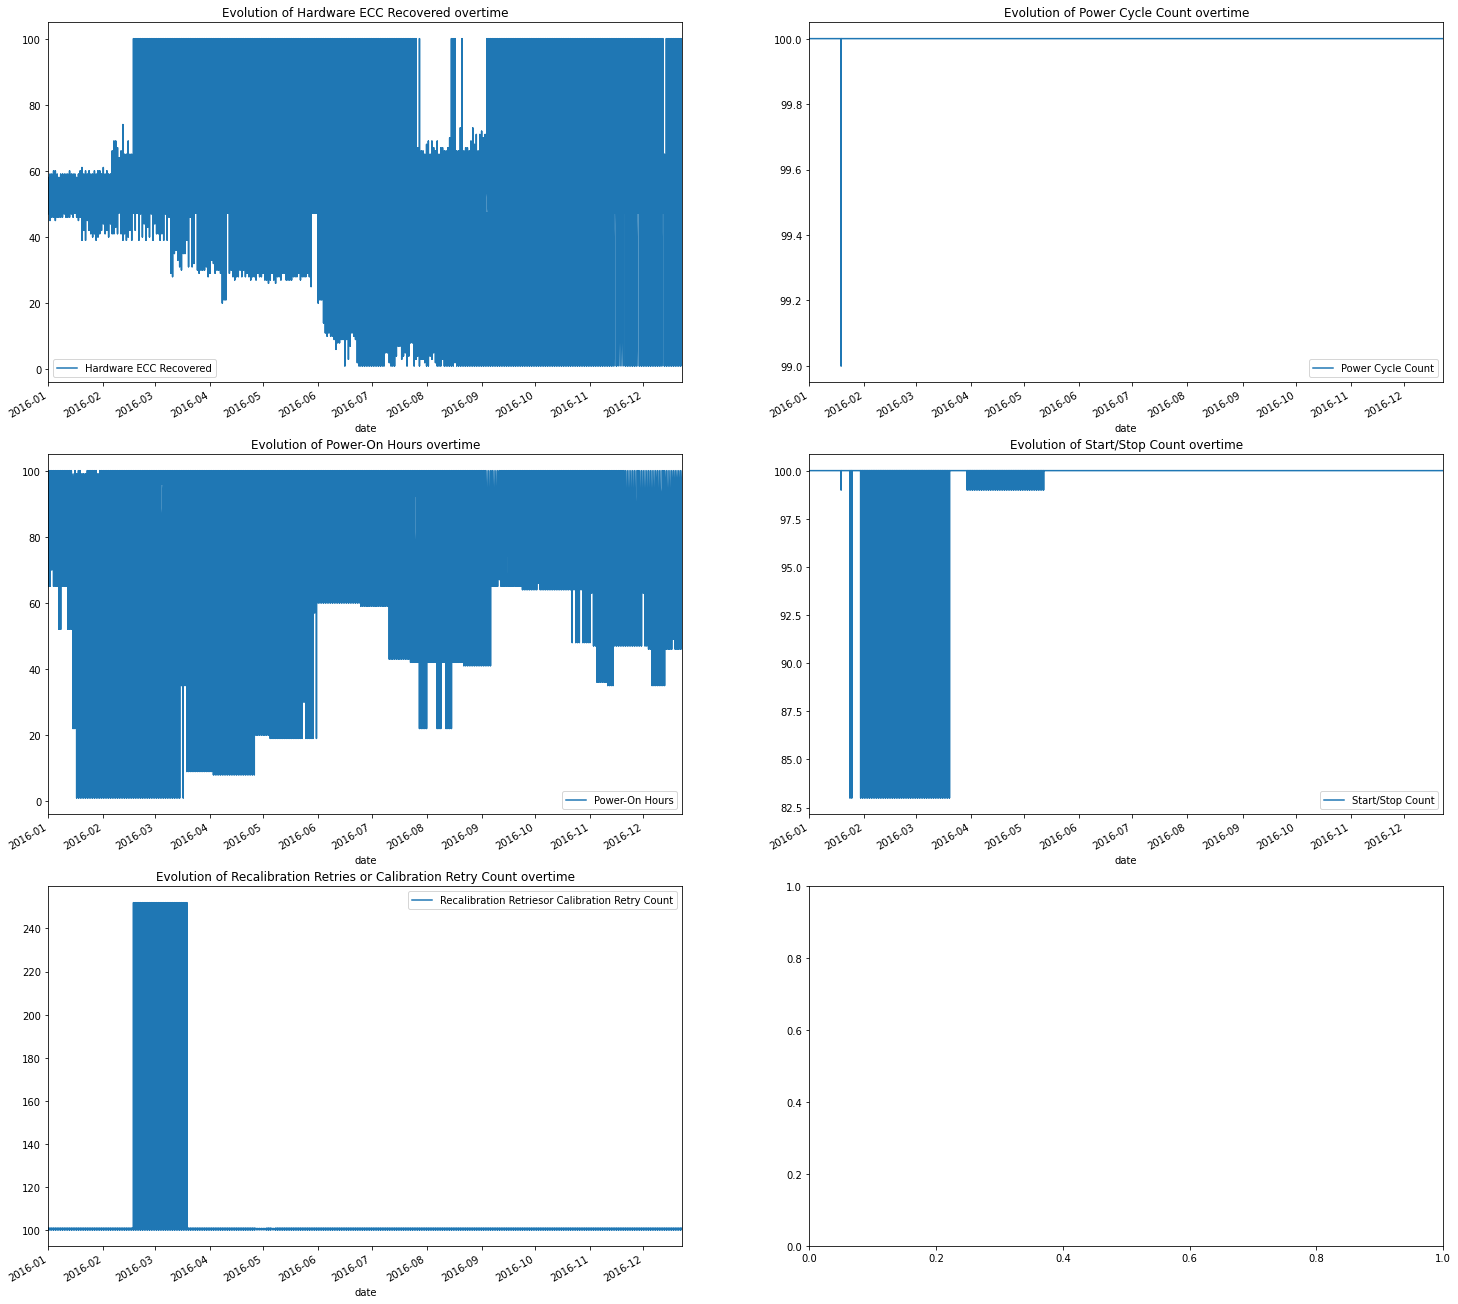

In [47]:
fig, ax =plt.subplots(3,2, figsize=(25,25))
((ax1, ax2),(ax3,ax4),(ax6,ax5))=ax
# plot the Evolution of Hardware ECC Recovered with time
df.plot(x='date', y='Hardware ECC Recovered', ax=ax1).set_title('Evolution of Hardware ECC Recovered overtime')

# plot the Evolution of Power Cycle Count with time
df.plot(x='date', y='Power Cycle Count', ax=ax2).set_title('Evolution of Power Cycle Count overtime')

# plot the Evolution of Power-On Hours with time
df.plot(x='date', y='Power-On Hours', ax=ax3).set_title('Evolution of Power-On Hours overtime')

# plot the Evolution of Start/Stop Count with time
df.plot(x='date', y='Start/Stop Count', ax=ax4).set_title('Evolution of Start/Stop Count overtime') 

# plot the Evolution of Seek Error Rate with time
#df.plot(x='date', y='Seek Error Rate', ax=ax5).set_title('Evolution of Seek Error Rate overtime')

# plot the Evolution of Recalibration Retriesor Calibration Retry Count with time
df.plot(x='date', y='Recalibration Retriesor\xa0Calibration Retry Count', ax=ax6).set_title('Evolution of Recalibration Retries or Calibration Retry Count overtime')

Having visualize the different features, we can easily realize there are some features we have to drop such as:

    - Power Cycle Count
    - Command Timeout	   
    - Recalibration Retriesor Calibration Retry Count
    
Those features cannot produce any added value to us.

In [49]:
# Let us drop meaningless features:
df.drop(['Command Timeout', 'Power Cycle Count', 'Recalibration Retriesor\xa0Calibration Retry Count'], axis=1, inplace =True)

Since there lot of individual outliers, let us rescale our feature for a reasonable, use.

In [50]:
# Let us drop categarical features, date, and capacity_bytes:
df_sc = df.drop(['date','model', 'capacity_bytes', 'serial_number'], axis =1)

In [51]:
# Let us visualise the first five rows:
df_sc.head()

,failure,Start/Stop Count,Seek Time Performance,Power-On Hours,SATA Downshift Error Count or Runtime Bad Block,End-to-End error / IOEDC,Reported Uncorrectable Errors,High Fly Writes,Temperature Difference or Airflow Temperature,G-sense Error Rate,Temperature or Temperature Celsius,Hardware ECC Recovered,Reallocation Event Count,(Offline) Uncorrectable Sector Count,Write Error Rate(Fujitsu),Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Read Error Rate
52,0,100.0,120.649283,88.0,100.000000,100.000000,100.000000,99.000000,78.000000,100.000000,22.0,47.213809,142.825123,100.0,116.8415,100.000000,114.000000
53,0,100.0,120.649283,99.0,100.000000,100.000000,100.000000,100.000000,70.000000,100.000000,30.0,47.213809,142.825123,100.0,116.8415,100.000000,118.000000
54,0,100.0,111.000000,97.0,99.481823,99.990012,99.341502,97.158837,73.849673,100.555697,230.0,47.213809,66.000000,100.0,116.8415,99.950238,38.908602
55,0,100.0,120.649283,78.0,99.481823,99.990012,99.341502,97.158837,73.849673,100.555697,132.0,47.213809,200.000000,100.0,100.0000,99.950238,200.000000
56,0,100.0,120.649283,99.0,100.000000,100.000000,100.000000,100.000000,70.000000,100.000000,30.0,47.213809,142.825123,100.0,116.8415,100.000000,116.000000


## Task 4 Model fitting and Task 5 Model evaluation

In [52]:
# Let us import the model to encode string features of the dataset:
le = preprocessing.LabelEncoder()

# Select string attributes for the dataset:
X_str = df[['model', 'capacity_bytes', 'serial_number', 'failure']]

# Let us preprocess string features of the dataset:
for i in range(X_str.shape[1]):
    le.fit(X_str.iloc[:,i])
    X_str.iloc[:,i] = le.transform(X_str.iloc[:,i])
X_str =pd.DataFrame(X_str)

In [53]:
# Let us concatenate string datasets features with numerical ones: 
X1 =pd.concat([df_sc, pd.DataFrame(X_str)],axis=1) 
X1.dropna(inplace=True)
# Define predictors and response variables
X = X1.drop('failure', axis=1).values     # predictors  variables
y = df_sc['failure']                      # response variables
print(y.shape, X.shape)

(67541,) (67541, 19)


In [54]:
# Let's split data into train and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

## 1. Clustering

We group together the usual combination of features. The points that are far from the cluster are points with unusual combinations of features.We consider those points as anomalies.

In [55]:
# Take useful feature and standardize them
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled)

In [56]:
#I choose 2 centroids arbitrarily and add these data to the central dataframe
n_clust = 2
kmeans = KMeans(n_clust).fit(X)
scores = kmeans.score(X)
df['cluster'] = kmeans.predict(X)

#to visualize we must reduce to 2 principle components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(df_pca)
df_pca = pd.DataFrame(np_scaled)

df['principal_feature1'] = df_pca[0]
df['principal_feature2'] = df_pca[1]
df['cluster'].value_counts()
df = df.dropna().copy()

#### Optimal number of clusters using Silhouette Score Method

Let's plot the silhouette score as a function of number of clusters 𝑘:

In [57]:
# Let us evaluate the model for clustering varying from 1 to 7 classes:
silhouette_score(df_pca, kmeans.labels_)
y_preds = [KMeans(n_clusters=k, random_state=5).fit(df_pca)
                for k in range(1, 7)]
silhouette_scores = [silhouette_score(df_pca, model.labels_)
                     for model in y_preds[1:]]

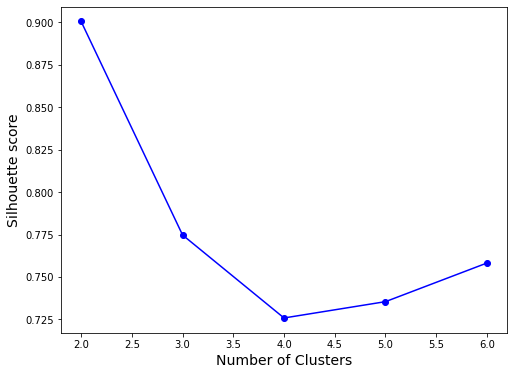

In [58]:
# Let us plot the curve of silhouette score per number of classes:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 7), silhouette_scores, "bo-")
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

### Interpretation

As we can see, this visualization is much richer and enable us to confirm that $k=2$ is the optimal choice as the number of clusters.


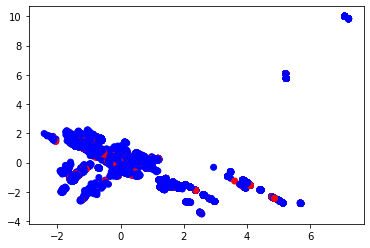

In [59]:
#plot the different clusters with the 2 main features
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
plt.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))

In [60]:
#I choose 2 centroids arbitrarily and add these data to the central dataframe
n_clust = 3
kmeans = KMeans(n_clust).fit(X)
scores = kmeans.score(X)
y_pred2 = kmeans.predict(X)

#to visualize we must reduce to 2 principle components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(df_pca)
df_pca = pd.DataFrame(np_scaled)

df['principal_feature1'] = df_pca[0]
df['principal_feature2'] = df_pca[1]
df = df.dropna().copy()

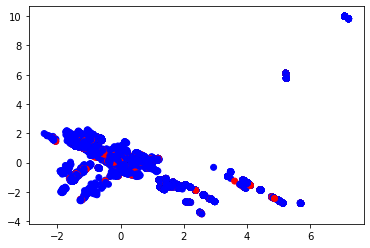

In [61]:
#plot the different clusters with the 2 main features)
colors = {0:'red', 1:'blue', 2:'green', 3:'pink', 4:'black', 5:'orange', 6:'cyan', 7:'yellow', 8:'brown', 9:'purple', 10:'white', 11: 'grey', 12:'lightblue', 13:'lightgreen', 14: 'darkgrey'}
plt.scatter(df['principal_feature1'], df['principal_feature2'], c=df["cluster"].apply(lambda x: colors[x]))

In [62]:
#define function to calcuate distance to cluster center
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.iloc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i] = np.linalg.norm(Xa-Xb)
    return distance

In [63]:
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(X, kmeans)
df['distance'] = distance

In [64]:
#set the fraction of point to classify as outliers
outliers_fraction = 0.01
# anomaly21 contain the anomaly result of cluster method (0:normal, 1:anomaly) 
distance = getDistanceByPoint(X, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly21 contain the anomaly result of method 2.1 Cluster (0:normal, 1:anomaly) 
df['anomaly21'] = (distance >= threshold).astype(int)

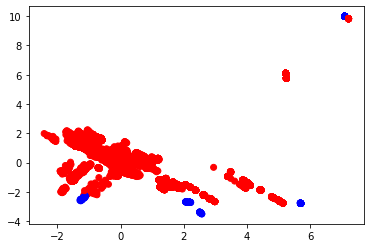

In [65]:
# visualisation of anomaly with cluster view
plt.scatter(df['principal_feature1'], df['principal_feature2'], c=df["anomaly21"].apply(lambda x: colors[x]))

#### Evaluate the model

In [66]:
# Let us check accuracy of the model:
silhouette_score(X, y_pred2)

0.7136984844647823

## 2. Random Forest

##### Using Random forest classification to plot importance

In [67]:
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(X_train)
X_train = pd.DataFrame(np_scaled)

In [68]:
# Let's fit the model and do the feature selection altogether
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
  

In [69]:
# We can now make a list and count the selected features.
selected_feat = pd.DataFrame(X_train).columns[(sel.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
# To get the name of the features selected
print("selected feature names': {}".format(selected_feat))

total features: 19
selected features: 5
selected feature names': Int64Index([2, 9, 11, 15, 18], dtype='int64')


#### Fit the model and plot feature importance

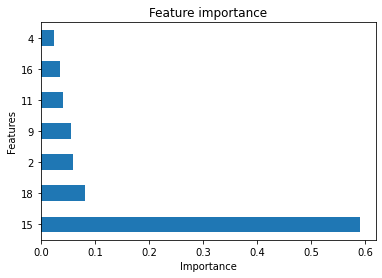

In [70]:
# Fit the model with RandomForestClassifier:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

# Feature importance
feat_importances = pd.Series(model.feature_importances_, )

# Visualise these with a barplot
feat_importances.nlargest(7).plot(kind='barh')
plt.title('Feature importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

#### Test and Evaluate the model

In [71]:
# Make predictions for the test set
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.9851946898287519

In [73]:
# View confusion matrix for test data and predictions
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_test)

In [74]:
# Let us compute accuracy:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 
print(" Accuracy:"+ str(accuracy(confusion_matrix)))

 Accuracy:0.9851946898287519


## 3. Gradient Boosting 

In [75]:
# Define predictors and response variables
X2 = X1.drop('failure', axis=1).values     # predictors  variables
y = df_sc['failure']                      # response variables

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=7)

# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled1 = min_max_scaler.fit_transform(X_train)
np_scaled2 = min_max_scaler.fit_transform(X_test)
X_test = pd.DataFrame(np_scaled2)
X_train = pd.DataFrame(np_scaled1)


# fit model on all training data
model = XGBClassifier()
model.fit(X_train, y_train)


# make predictions for test data and evaluate
y_pred = model.predict(X_test)

# make evaluation for data  
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.63%


## Task 6 Produce recommendations

In [76]:
# Load data:
df_test = pd.read_csv('ml_summative_predict.csv', sep = ';')
df_test.head() # print out the first five rows

,Unnamed: 0,date,serial_number,model,capacity_bytes,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,...,Load/Unload Cycle Count,Load In-time,Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Retry Rate,Minimum Spares Remaining,Newly Added Bad Flash Block,Free Fall Protection,Read Error Rate
0,1,2016-12-25,W3015JSX,ST4000DM000,"4,00079E+12",NaN,92,100,100,75,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN
1,2,2016-12-25,ZA10Q2F7,ST8000DM002,"8,00156E+12",NaN,96,100,100,86,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,70
2,3,2016-12-25,9VYC10JY,ST3160316AS,"1,60042E+11",NaN,97,100,100,87,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,NaN
3,4,2016-12-25,Z304KBY0,ST4000DM000,"4,00079E+12",NaN,94,100,100,87,...,NaN,NaN,100.0,100.0,100.0,NaN,NaN,NaN,NaN,"15,59842504"
4,5,2016-12-25,WD-WXU1E83UUNF8,WDC WD5000LPVX,"5,00108E+11",NaN,152,100,200,200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let clean the dataset:

In [77]:
# Let us get rid of all the columns where more than 95 percent of values are null:
df_test.drop(df_test.loc[:,(df_test.isnull().sum()/df_test.isnull().count()*100)>=95], axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [78]:
df_test.head()

,date,serial_number,model,capacity_bytes,Throughput Performance,Spin-Up Time,Start/Stop Count,Reallocated Sectors Count,Seek Error Rate,Seek Time Performance,...,Hardware ECC Recovered,Reallocation Event Count,Current Pending Sector Count,(Offline) Uncorrectable Sector Count,UltraDMA CRC Error Count,Write Error Rate(Fujitsu),Head Flying Hours or 'Transfer Error Rate'(Fujitsu),Total LBAs Written,Total LBAs Read,Read Error Rate
0,2016-12-25,W3015JSX,ST4000DM000,"4,00079E+12",NaN,92,100,100,75,NaN,...,NaN,NaN,100,100,200,NaN,100.0,100.0,100.0,NaN
1,2016-12-25,ZA10Q2F7,ST8000DM002,"8,00156E+12",NaN,96,100,100,86,NaN,...,1.0,NaN,100,100,200,NaN,100.0,100.0,100.0,70
2,2016-12-25,9VYC10JY,ST3160316AS,"1,60042E+11",NaN,97,100,100,87,NaN,...,61.0,NaN,100,100,200,NaN,100.0,100.0,100.0,NaN
3,2016-12-25,Z304KBY0,ST4000DM000,"4,00079E+12",NaN,94,100,100,87,NaN,...,NaN,NaN,100,100,200,NaN,100.0,100.0,100.0,"15,59842504"
4,2016-12-25,WD-WXU1E83UUNF8,WDC WD5000LPVX,"5,00108E+11",NaN,152,100,200,200,NaN,...,NaN,200.0,200,100,200,100.0,NaN,NaN,NaN,NaN


In [79]:
# Let us check with percentage missing values:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Write Error Rate(Fujitsu),155,89.595376
Recalibration Retriesor Calibration Retry Count,155,89.595376
Throughput Performance,153,88.439306
Seek Time Performance,153,88.439306
Reallocation Event Count,142,82.080925
Hardware ECC Recovered,138,79.768786
Read Error Rate,77,44.508671
SATA Downshift Error Count or Runtime Bad Block,46,26.589595
Temperature Difference or Airflow Temperature,31,17.919075
End-to-End error / IOEDC,31,17.919075


In [80]:
# Now let us drop those features:
df_test.drop([ 'Reallocated Sectors Count', 'Spin Retry Count', 'Spin-Up Time', 'Throughput Performance', 'Current Pending Sector Count', 'Seek Error Rate', 
         'Total LBAs Read', 'Total LBAs Written', 'Load Cycle Count\xa0or\xa0Load/Unload Cycle Count\xa0(Fujitsu)', 'Power-off Retract Count,\xa0Emergency Retract Cycle Count(Fujitsu)or\xa0Unsafe Shutdown Count'], axis =1, inplace = True)

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 24 columns):
date                                                   173 non-null object
serial_number                                          173 non-null object
model                                                  173 non-null object
capacity_bytes                                         173 non-null object
Start/Stop Count                                       173 non-null int64
Seek Time Performance                                  20 non-null float64
Power-On Hours                                         173 non-null int64
Recalibration Retriesor Calibration Retry Count        18 non-null float64
Power Cycle Count                                      173 non-null int64
SATA Downshift Error Count or Runtime Bad Block        127 non-null float64
End-to-End error / IOEDC                               142 non-null float64
Reported Uncorrectable Errors                          142 non-null flo

In [82]:
df_test['Read Error Rate'] = pd.to_numeric(df_test['Read Error Rate'], errors='coerce')

In [83]:
# Checking Numerical Data
df_test.select_dtypes(include=['int64','float64']).columns.values

array(['Start/Stop Count', 'Seek Time Performance', 'Power-On Hours',
       'Recalibration Retriesor\xa0Calibration Retry Count',
       'Power Cycle Count',
       'SATA Downshift Error Count\xa0or\xa0Runtime Bad Block',
       'End-to-End error / IOEDC', 'Reported Uncorrectable Errors',
       'Command Timeout', 'High Fly Writes',
       'Temperature Difference\xa0or\xa0Airflow Temperature',
       'G-sense Error Rate', 'Temperature\xa0or\xa0Temperature Celsius',
       'Hardware ECC Recovered', 'Reallocation Event Count',
       '(Offline) Uncorrectable Sector Count', 'UltraDMA CRC Error Count',
       'Write Error Rate(Fujitsu)',
       "Head Flying Hours\xa0or 'Transfer Error Rate'(Fujitsu)",
       'Read Error Rate'], dtype=object)

In [84]:
# Let us fill the missing values with the mean:
df_test['Seek Time Performance'] = df_test['Seek Time Performance'].fillna(df_test['Seek Time Performance'].mean())
df_test['Hardware ECC Recovered'] = df_test['Hardware ECC Recovered'].fillna(df_test['Hardware ECC Recovered'].mean())
df_test['Write Error Rate(Fujitsu)'] = df_test['Write Error Rate(Fujitsu)'].fillna(df_test['Write Error Rate(Fujitsu)'].mean())
df_test['High Fly Writes'] = df_test['High Fly Writes'].fillna(df_test['High Fly Writes'].mean())
df_test["Head Flying Hours\xa0or 'Transfer Error Rate'(Fujitsu)"] = df_test["Head Flying Hours\xa0or 'Transfer Error Rate'(Fujitsu)"].fillna(df_test["Head Flying Hours\xa0or 'Transfer Error Rate'(Fujitsu)"].mean())
df_test['Reported Uncorrectable Errors'] = df_test['Reported Uncorrectable Errors'].fillna(df_test['Reported Uncorrectable Errors'].mean())
df_test['End-to-End error / IOEDC'] = df_test['End-to-End error / IOEDC'].fillna(df_test['End-to-End error / IOEDC'].mean())
df_test['Command Timeout'] = df_test['Command Timeout'].fillna(df_test['Command Timeout'].mean())
df_test['Temperature Difference\xa0or\xa0Airflow Temperature'] = df_test['Temperature Difference\xa0or\xa0Airflow Temperature'].fillna(df['Temperature Difference\xa0or\xa0Airflow Temperature'].mean())
df_test['G-sense Error Rate'] = df_test['G-sense Error Rate'].fillna(df_test['G-sense Error Rate'].mean())
df_test['Temperature\xa0or\xa0Temperature Celsius'] = df_test['Temperature\xa0or\xa0Temperature Celsius'].fillna(df_test['Temperature\xa0or\xa0Temperature Celsius'].mean())
df_test['Power-On Hours'] = df_test['Power-On Hours'].fillna(df_test['Power-On Hours'].mean())
df_test['Recalibration Retriesor\xa0Calibration Retry Count'] = df_test['Recalibration Retriesor\xa0Calibration Retry Count'].fillna(df_test['Recalibration Retriesor\xa0Calibration Retry Count'].mean())
df_test['Reallocation Event Count']= df_test['Reallocation Event Count'].fillna(df_test['Reallocation Event Count'].mean())
df_test['Start/Stop Count'] = df_test['Start/Stop Count'].fillna(df_test['Start/Stop Count'].mean())
df_test['(Offline) Uncorrectable Sector Count'] = df_test['(Offline) Uncorrectable Sector Count'].fillna(df_test['(Offline) Uncorrectable Sector Count'].mean())
df_test['SATA Downshift Error Count\xa0or\xa0Runtime Bad Block'] = df_test["SATA Downshift Error Count\xa0or\xa0Runtime Bad Block"].fillna(df_test["SATA Downshift Error Count\xa0or\xa0Runtime Bad Block"].mean()) 
df_test['Read Error Rate'] = df_test['Read Error Rate'].fillna(df_test['Read Error Rate'].mean())

In [85]:
# Let us check with percentage missing values:
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()*100).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Read Error Rate,0,0.0
Head Flying Hours or 'Transfer Error Rate'(Fujitsu),0,0.0
serial_number,0,0.0
model,0,0.0
capacity_bytes,0,0.0
Start/Stop Count,0,0.0
Seek Time Performance,0,0.0
Power-On Hours,0,0.0
Recalibration Retriesor Calibration Retry Count,0,0.0
Power Cycle Count,0,0.0


In [86]:
# Let us drop meaningless features:
df_test.drop(['Command Timeout', 'Power Cycle Count', 'UltraDMA CRC Error Count','Recalibration Retriesor\xa0Calibration Retry Count'], axis=1, inplace =True)

In [87]:
df_test.shape

(173, 20)

In [88]:
# Checking categorical Data
df_test.select_dtypes(include=['object']).columns.values

array(['date', 'serial_number', 'model', 'capacity_bytes'], dtype=object)

#### Split Dataset

In [116]:
# Let us import the model to encode string features of the dataset:
le = preprocessing.LabelEncoder()

# Select string attributes for the dataset:
X_str1 = df_test[['model', 'serial_number', 'capacity_bytes']]

# Let us preprocess string features of the dataset:
for i in range(X_str1.shape[1]):
    le.fit(X_str1.iloc[:,i])
    X_str1.iloc[:,i] = le.transform(X_str1.iloc[:,i])
X_str1 =pd.DataFrame(X_str1)

In [117]:
# Select numerical attributes for the dataset:
X_num = df_test.drop(['model', 'capacity_bytes', 'serial_number','date'], axis = 1)
X_num.shape

(173, 16)

In [118]:
# standardize these 2 new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(X_num)
X_num = pd.DataFrame(np_scaled)

In [119]:
# Let us concatenate string datasets features with numerical ones: 
X_test =pd.concat([X_num, pd.DataFrame(X_str1)],axis=1) 

# Define predictors and response variables
X_test.dropna(inplace=True)     # predictors  variables
print(X_test.shape)

(173, 19)


#### refit data on ml_summative_raw.cvs

In [109]:
# Considering the model of classification link to random forest, let us predict on the test set data:
# Let's recall the fitting data on the raw dataset:

X = X1.drop('failure', axis=1).values     # predictors  variables
y = df_sc['failure']                      # response variables

# standardize these new features
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled)

# Let's fit the model and do the feature selection altogether
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)

# Fit the model with RandomForestClassifier:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Evaluate on the new data set (ml_summative_predict.csv)

In [121]:
# Make predictions for the test set
y_pred_test1 = model.predict(X_test)
y_pred_test1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [124]:
count = 0
for i in y_pred_test1:
    if (i==0):
        count=count+1
print("There are " +str(count)+ " drive amount 173 new drive that work correctly with a possibility error of 2 percent.")

There are 145 drive amount 173 new drive that work correctly with a possibility error of 2 percent.


In [126]:
print("The accuracy on the new unseen dataset is equai to: " +str(count/173)) 

The accuracy on the new unseen dataset is equai to: 0.838150289017341
